Problem Description - 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
•	Date - The date of the observation

•	Average Price - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

Problem Statement - One Classification and One Regression Problem (To find the region and find the average price of Avocado )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Identifier Column - Unnamed Can be removed

In [4]:
df.shape

(18249, 14)

18249 - Rows and 14 Columns present in Data set 

In [5]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Null Values Present

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are 3 Object Columns present in the Dataset which will require Encoding

In [8]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Skewness is present in almost all the Columns

In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1.Counts are equal is all the columns 
2. Outliers are present as difference between mean , min and interquartile is uneven

### Univariate Analysis 

In [10]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Seperating Categorical and Continous Features

In [11]:
features_cate = ['year', 'region', 'type']
features_cont = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',]

conventional    9126
organic         9123
Name: type, dtype: int64

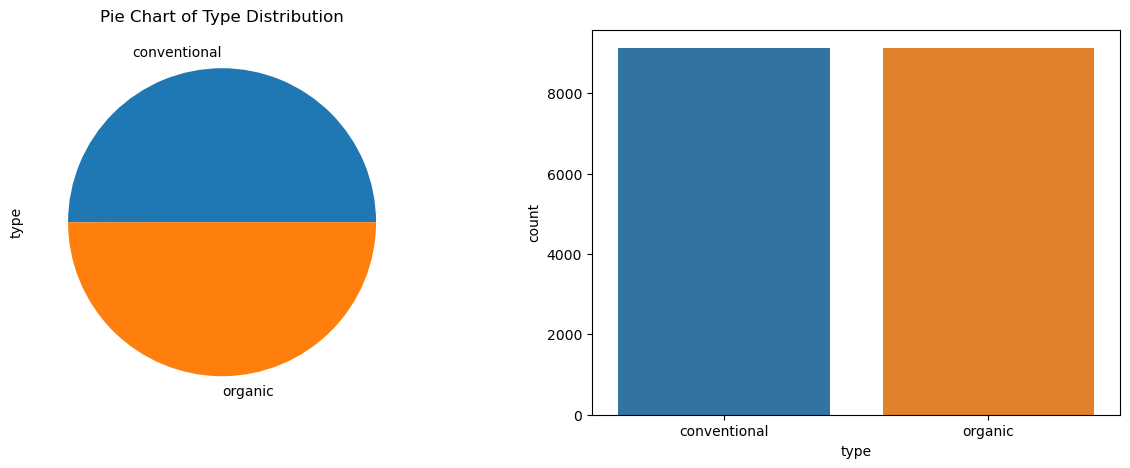

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie()
plt.title('Pie Chart of Type Distribution')
plt.subplot(1,2,2)
sns.countplot(data=df, x='type')
df['type'].value_counts()

Both Organic and Conventional Types are Equally Distributed

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

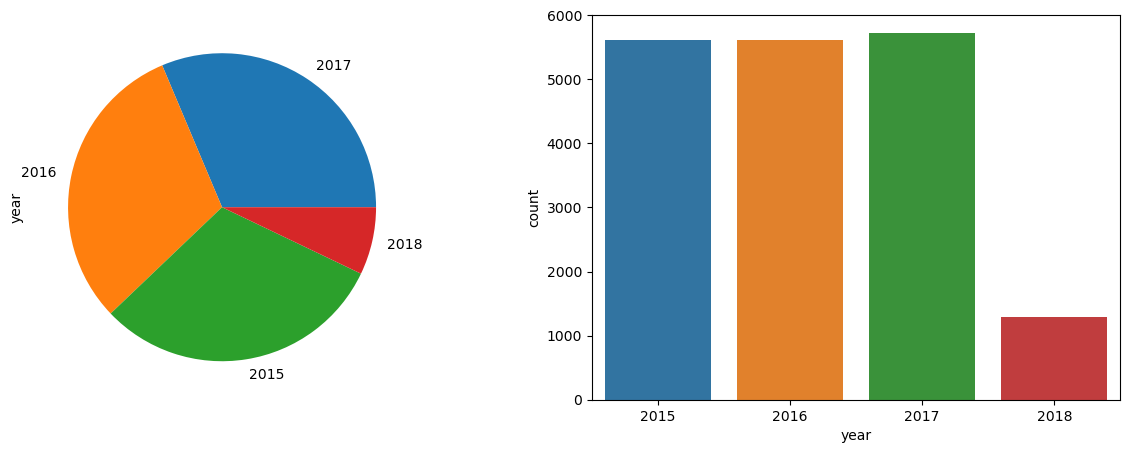

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie()
plt.subplot(1,2,2)
sns.countplot(data=df, x='year')
df['year'].value_counts()

Year 2017 has the Maximum data whereas 2018 has the least

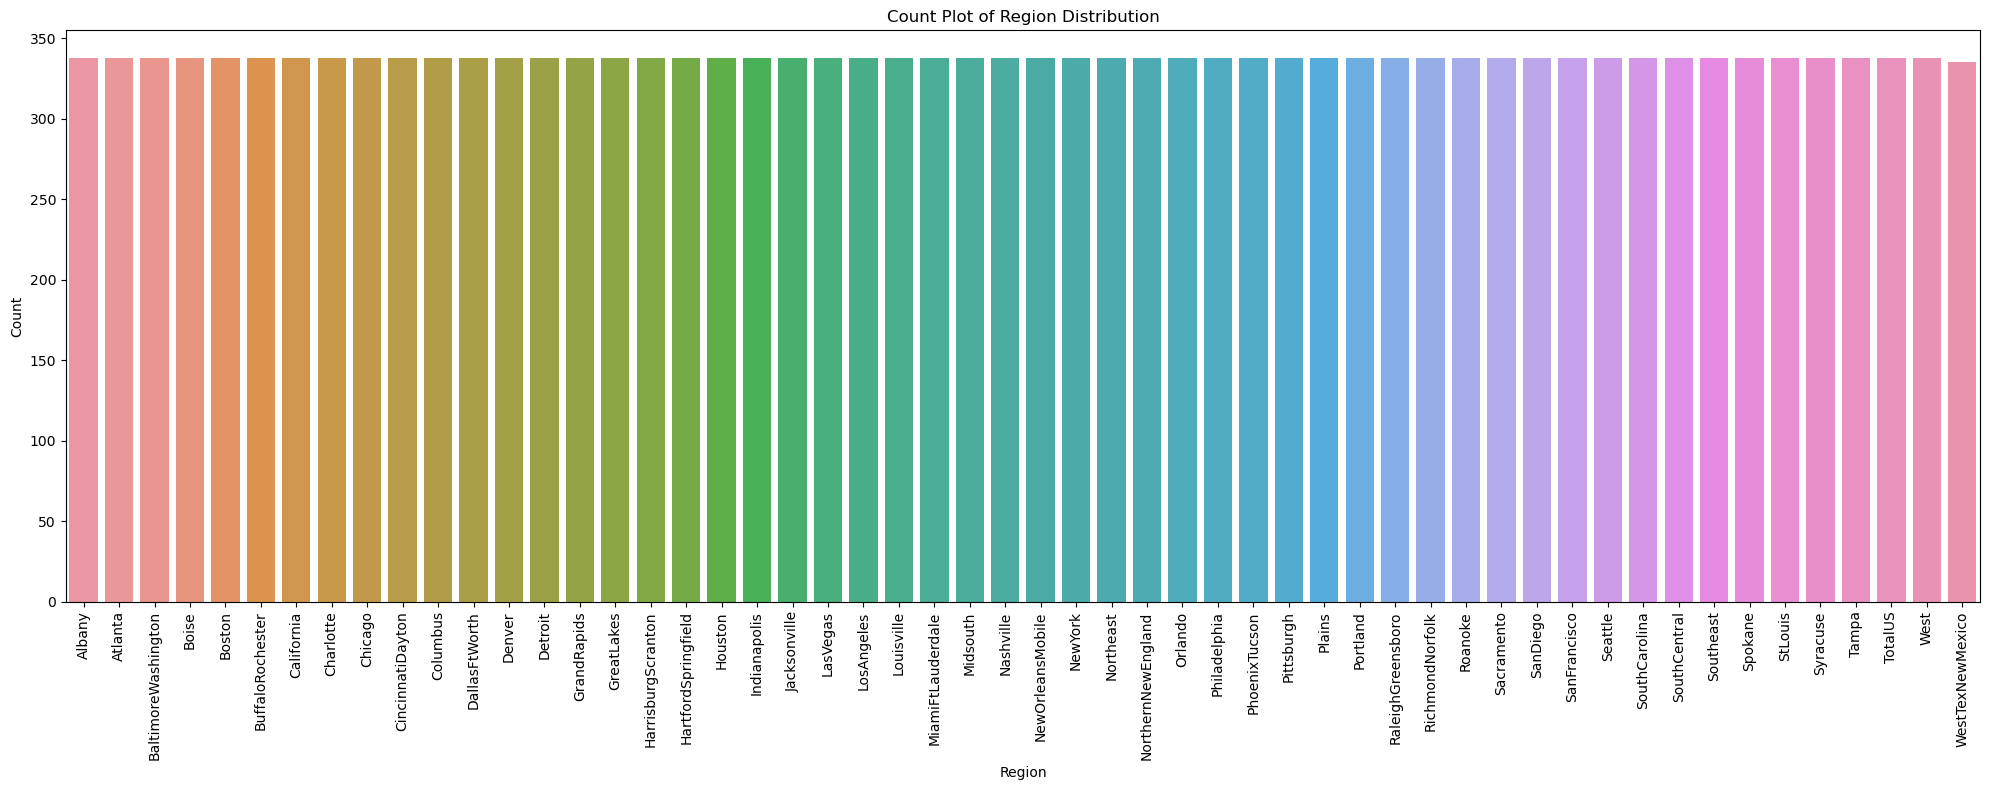

Number of Regions: 54


In [14]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='region')
plt.xticks(rotation=90)
plt.title('Count Plot of Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("Number of Regions:", df['region'].nunique())

Except "West Tex Mexico" all Regions have equal Production

Minimum Average Price: 0.44
Maximum Average Price: 3.25


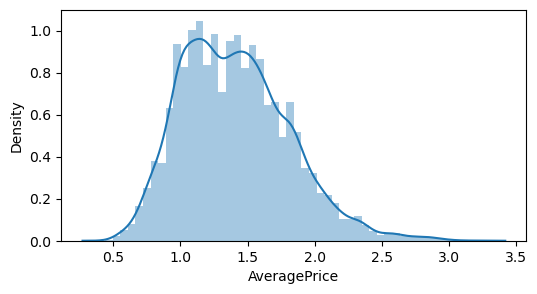

In [15]:
plt.figure(figsize=(6, 3))
sns.distplot(df['AveragePrice'])
print('Minimum Average Price:',df['AveragePrice'].min())
print('Maximum Average Price:',df['AveragePrice'].max())

Price Range of 0.44 to 3.25 in Average Price of Avocados shows presence of Skewness

Minimum Volume: 84.56
Maximum Volume Price: 62505646.52


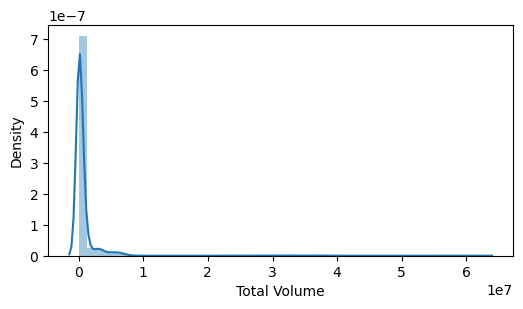

In [16]:
plt.figure(figsize=(6, 3))
sns.distplot(df['Total Volume'])
print('Minimum Volume:',df['Total Volume'].min())
print('Maximum Volume Price:',df['Total Volume'].max())

The Data is highly Skewed to Right

Minimum Volume: 0.0
Maximum Volume Price: 22743616.17


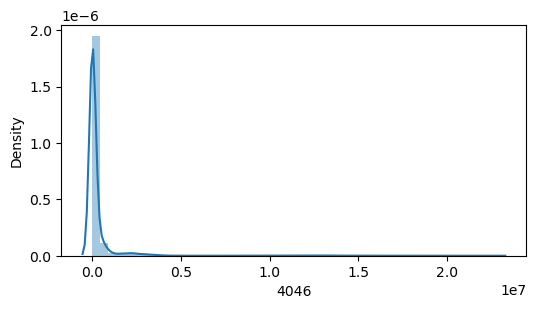

In [17]:
plt.figure(figsize=(6, 3))
sns.distplot(df['4046'])
print('Minimum Volume:',df['4046'].min())
print('Maximum Volume Price:',df['4046'].max())

For 4046 the data is highly skewed to the right

Minimum Volume: 0.0
Maximum Volume Price: 2546439.11


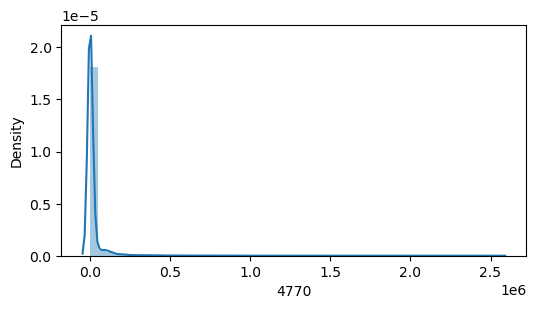

In [18]:
plt.figure(figsize=(6, 3))
sns.distplot(df['4770'])
print('Minimum Volume:',df['4770'].min())
print('Maximum Volume Price:',df['4770'].max())

For 4770 The Data is highly skewed to right

For Product Look up 4225: 0.0
For Product Look up 4225: 20470572.61


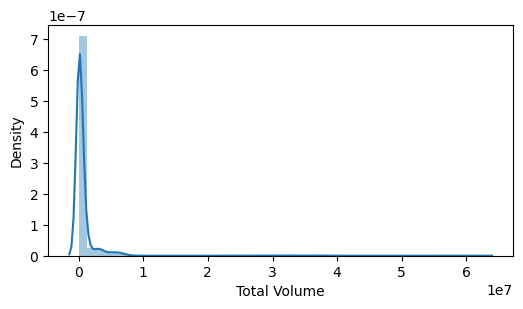

In [19]:
plt.figure(figsize=(6, 3))
sns.distplot(df['Total Volume'])
print('For Product Look up 4225:',df['4225'].min())
print('For Product Look up 4225:',df['4225'].max())

For Product look up data is highly skewed to right

For Total Bags: 0.0
For Total Bags: 19373134.37


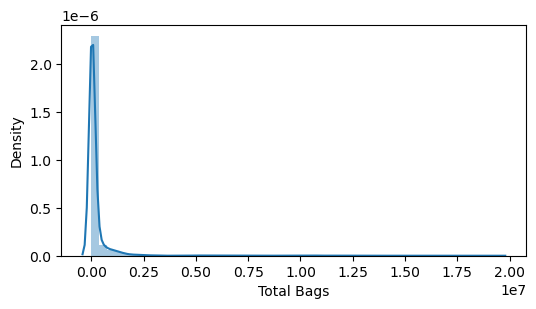

In [20]:
plt.figure(figsize=(6, 3))
sns.distplot(df['Total Bags'])
print('For Total Bags:',df['Total Bags'].min())
print('For Total Bags:',df['Total Bags'].max())

For Total Bags Data is Highly Skewed to Right

For Small Bags: 0.0
For Small Bags: 13384586.8


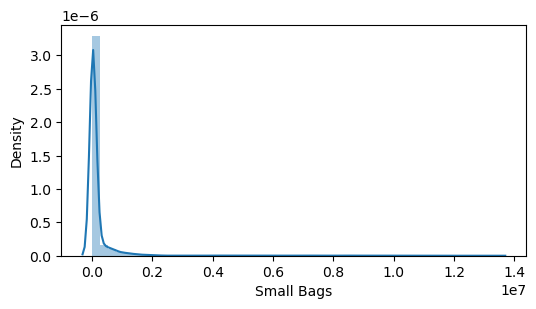

In [21]:
plt.figure(figsize=(6, 3))
sns.distplot(df['Small Bags'])
print('For Small Bags:',df['Small Bags'].min())
print('For Small Bags:',df['Small Bags'].max())

For Small Bags Data is Highly Skewed to Right

For Large Bags: 0.0
For Large Bags: 5719096.61


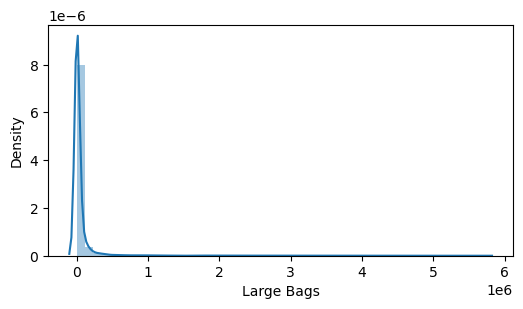

In [22]:
plt.figure(figsize=(6, 3))
sns.distplot(df['Large Bags'])
print('For Large Bags:',df['Large Bags'].min())
print('For Large Bags:',df['Large Bags'].max())

For Large Bags Data is Highly Skewed to the Right

For XLarge Bags: 0.0
For XLarge Bags: 551693.65


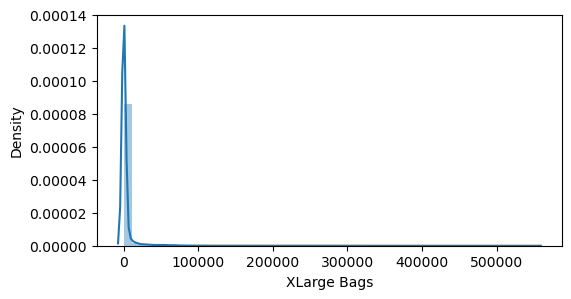

In [23]:
plt.figure(figsize=(6, 3))
sns.distplot(df['XLarge Bags'])
print('For XLarge Bags:',df['XLarge Bags'].min())
print('For XLarge Bags:',df['XLarge Bags'].max())

For XLarge Bags Data is Highly Skewed to Right

All the Coninous Features are Highly Skewed to the Right,

Now, Going to Find Outliers

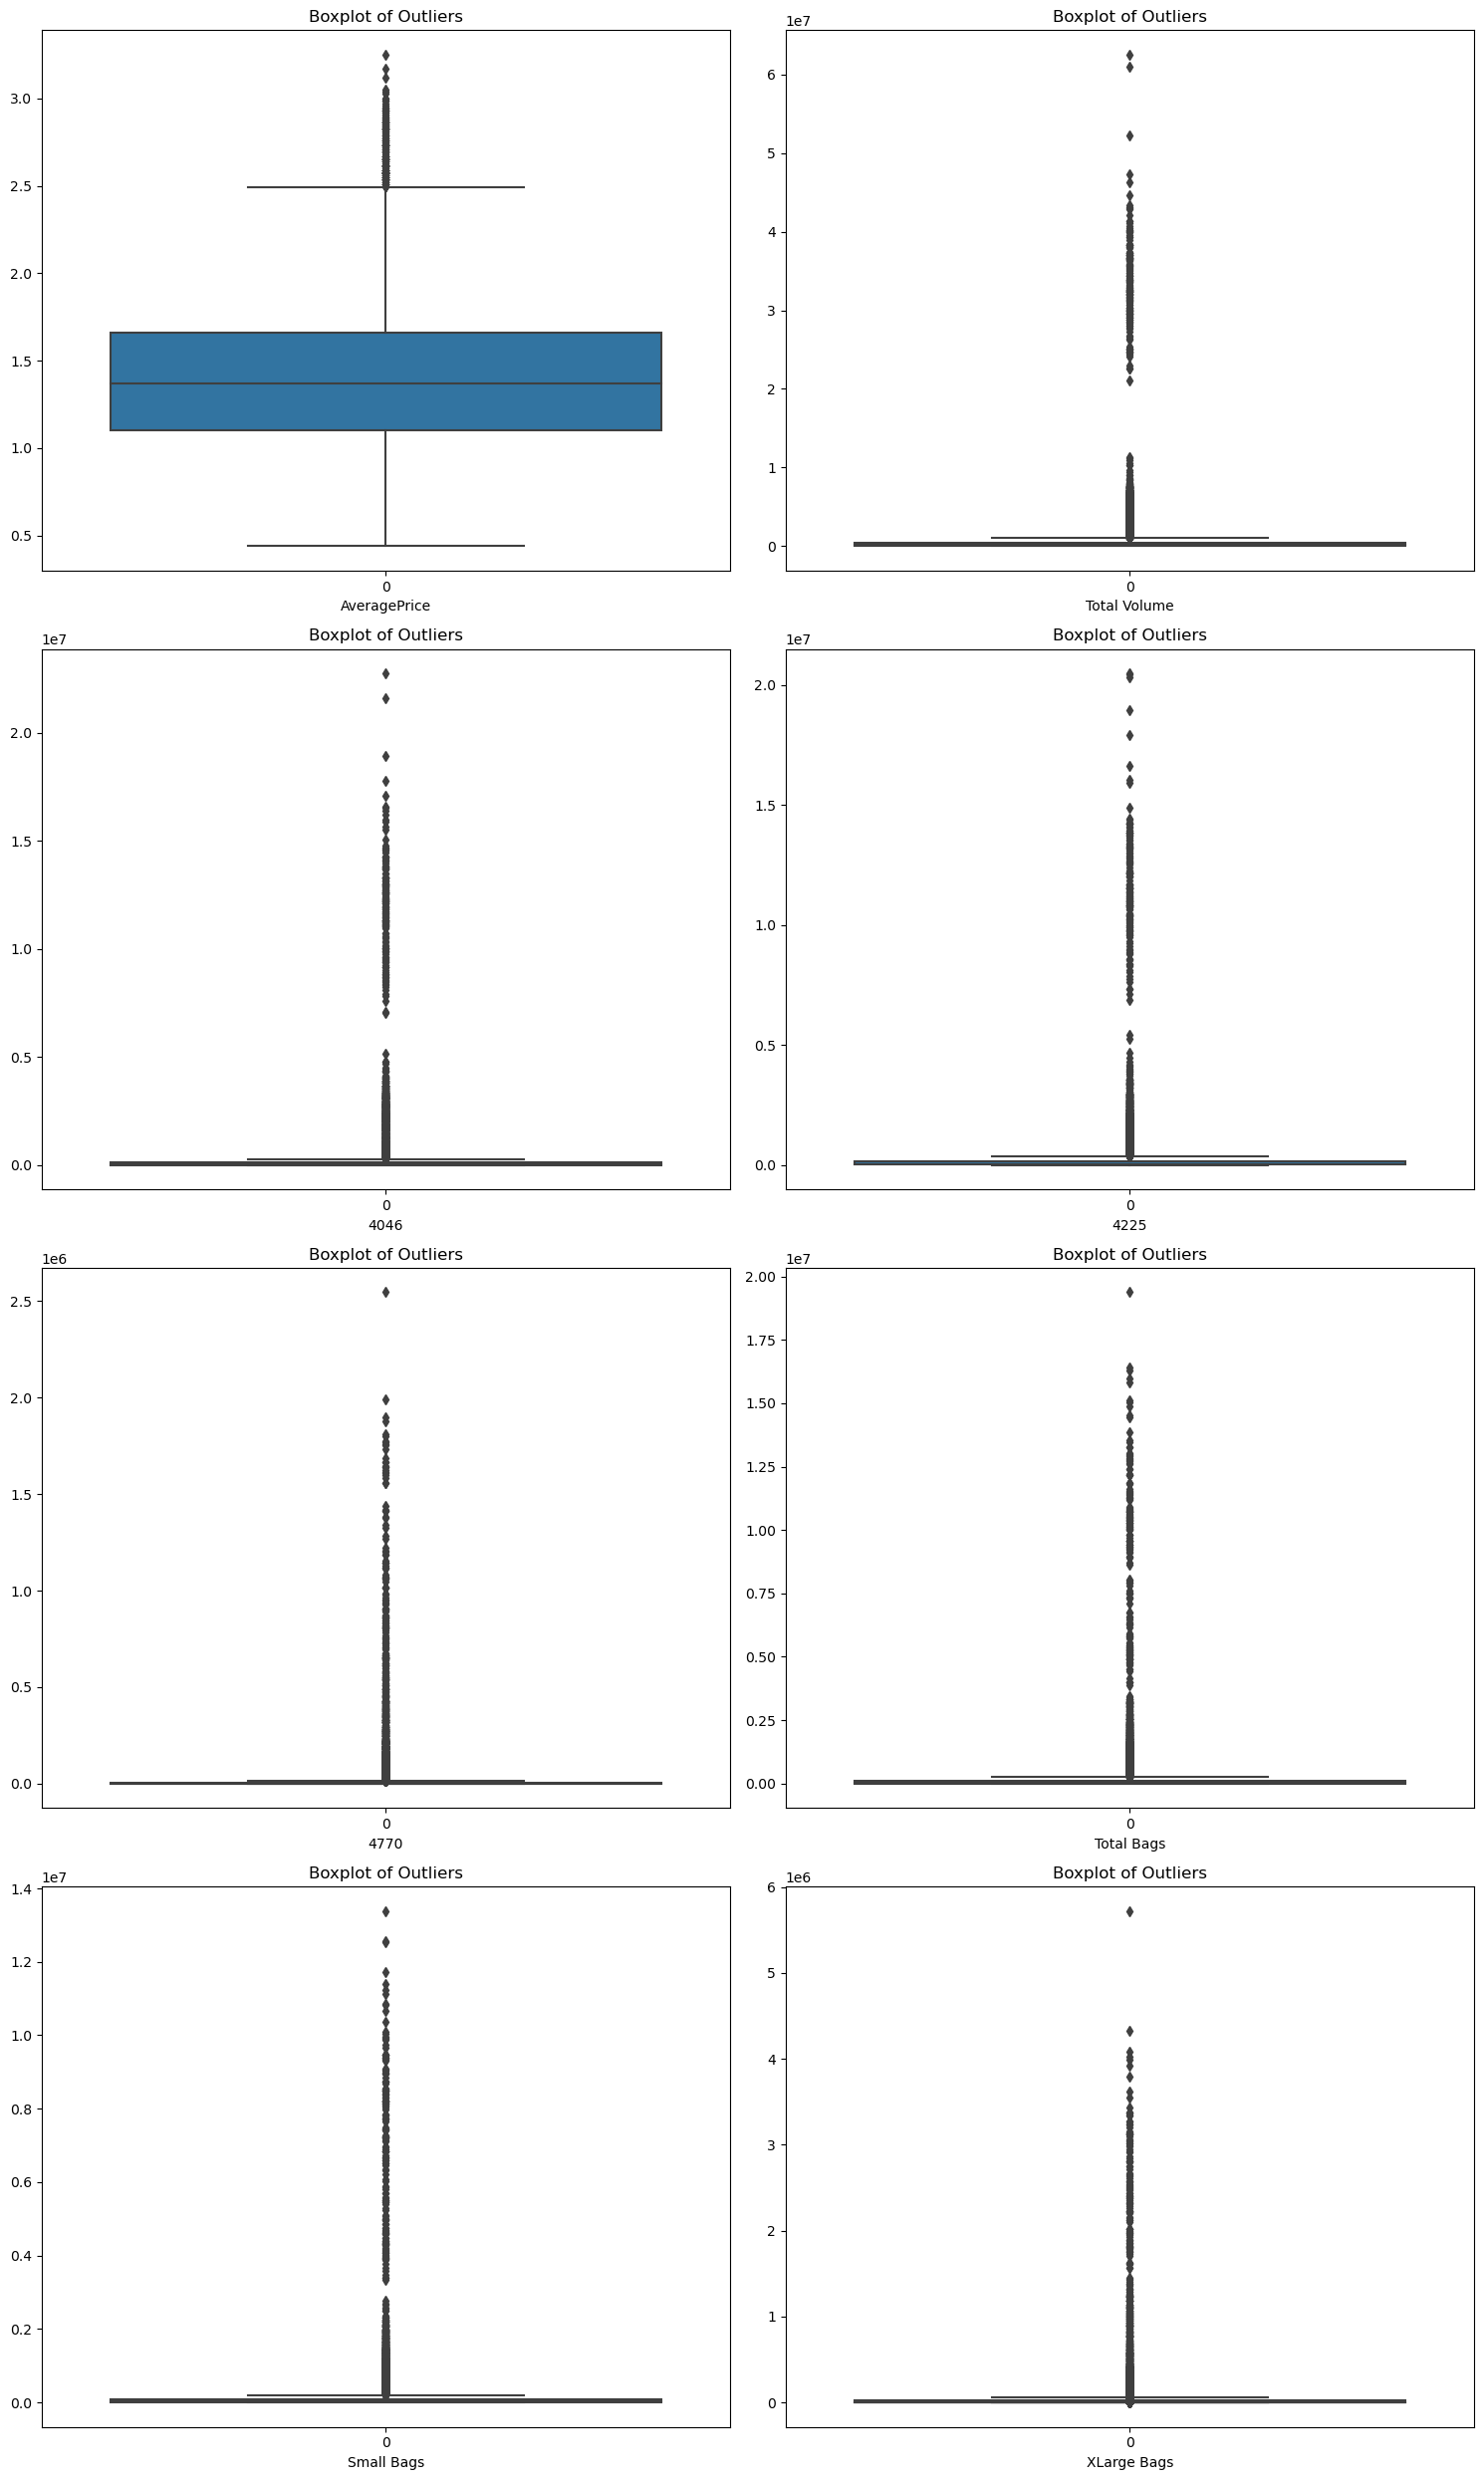

In [24]:
fig, ax=plt.subplots(4, 2, figsize=(15, 25))

for i, n in enumerate(features_cont):
    if i < 8:
        r = i // 2
        c = i % 2
    
    
    sns.boxplot(df[n], ax=ax[r, c])
    ax[r, c].set_title(f'Boxplot of Outliers')
    ax[r, c].set_xlabel(n)
    
plt.tight_layout()
plt.show()

There are Large Number of Outliers present in all The Continous Features which will be requied to be Removed

<Axes: xlabel='year', ylabel='region'>

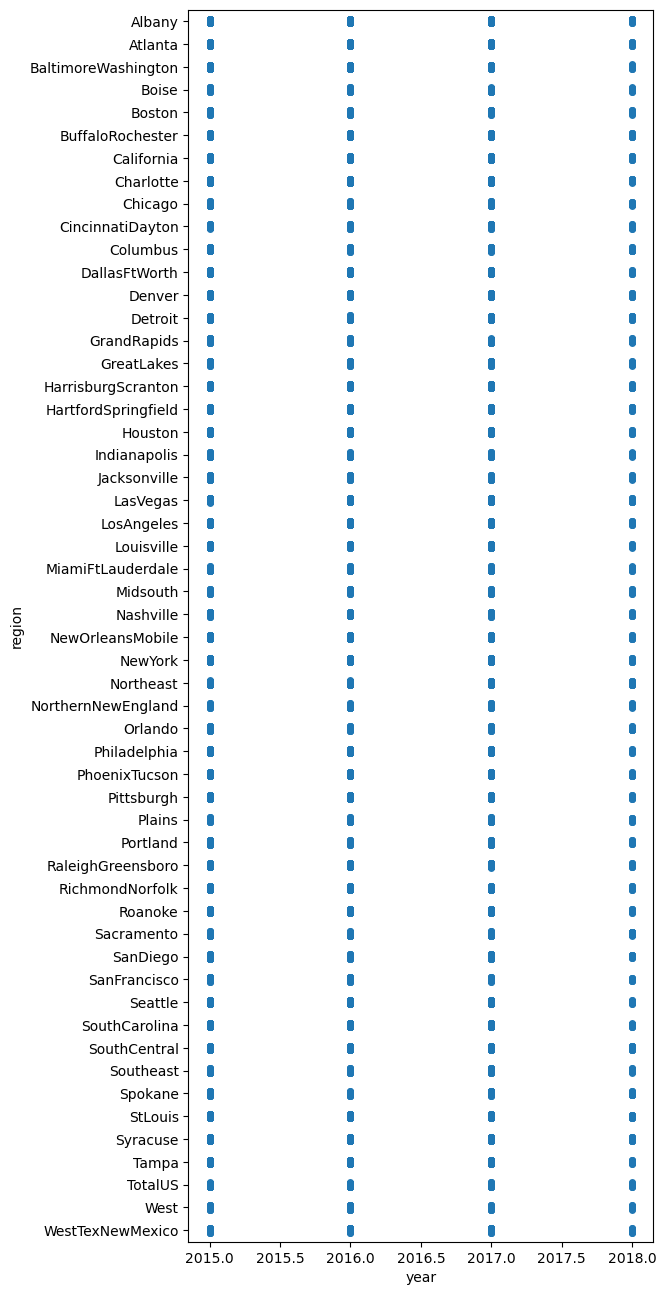

In [25]:
plt.figure(figsize=(6, 16))
sns.stripplot(x='year', y='region',data=df)

All Regions sell Avocoda Every Year

Let's See Sales of Avocado

<Axes: xlabel='year', ylabel='AveragePrice'>

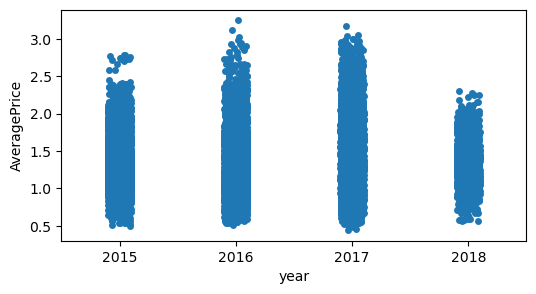

In [26]:
plt.figure(figsize=(6, 3))
sns.stripplot(x='year', y='AveragePrice', data=df)

1. 2016 has the Highest Average Price

2. Average Price Seems to Increase Everyyear except 2018 which can be Exception

<Axes: xlabel='type', ylabel='AveragePrice'>

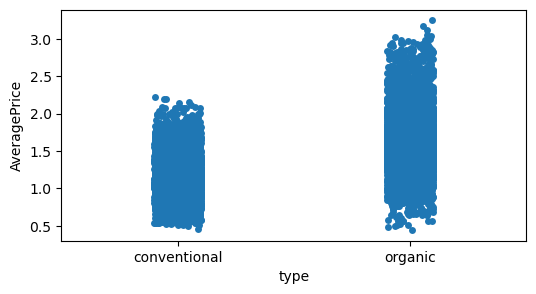

In [27]:
plt.figure(figsize=(6, 3))
sns.stripplot(x='type', y='AveragePrice', data=df)

As Expected Organic Avocado are Costlier than Conventional Avocado's

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

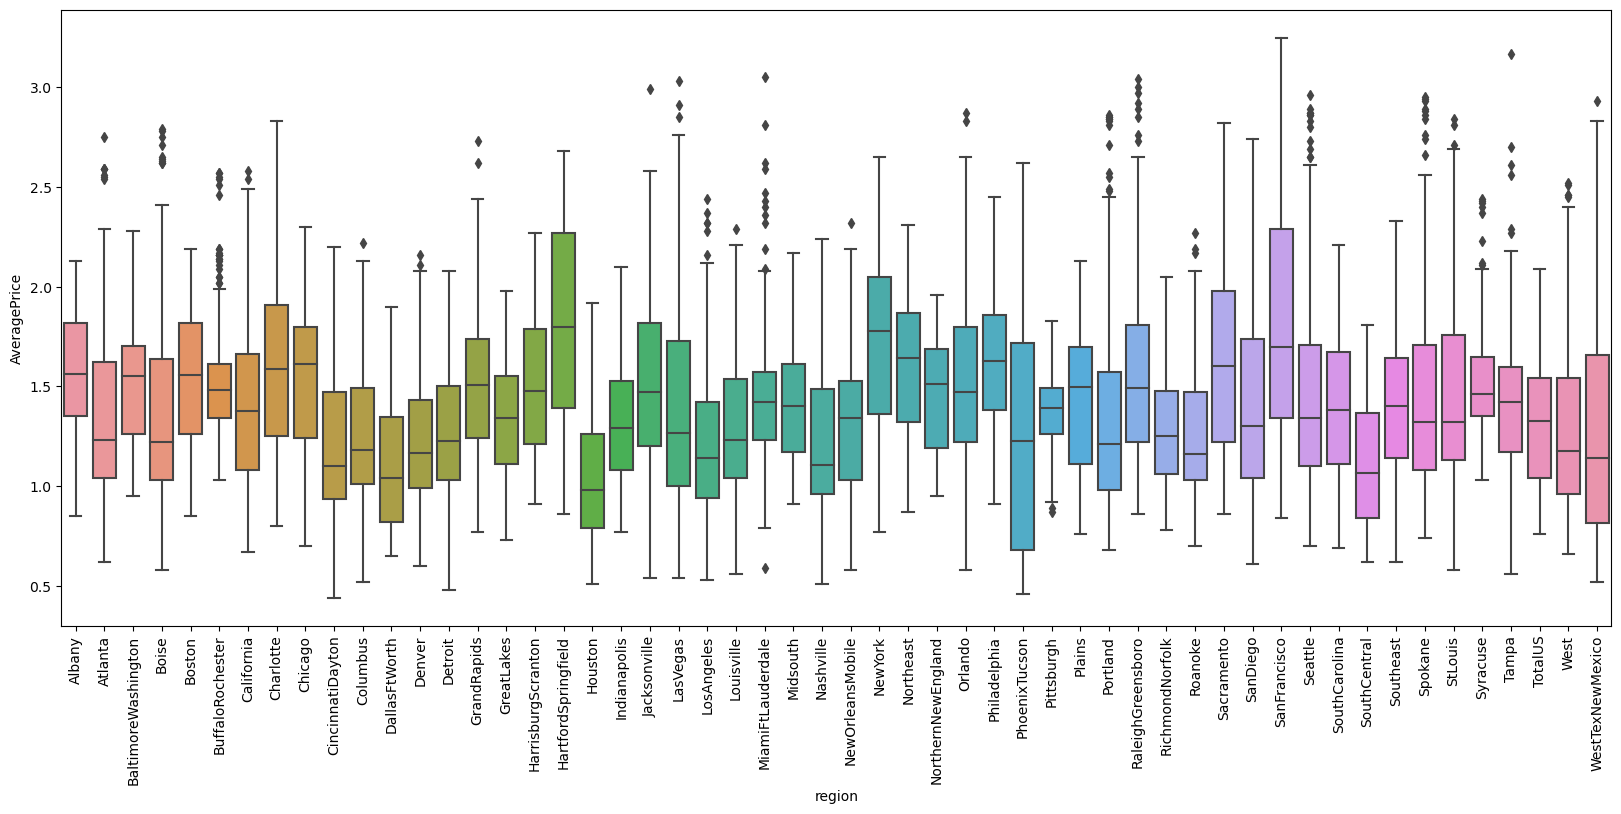

In [28]:
plt.figure(figsize=(20,8))
sns.boxplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)

San Dieago, Las Vegas and Charlotte Regions have the Highest Average Price

While the Least Average Price is in PhoenixTucson

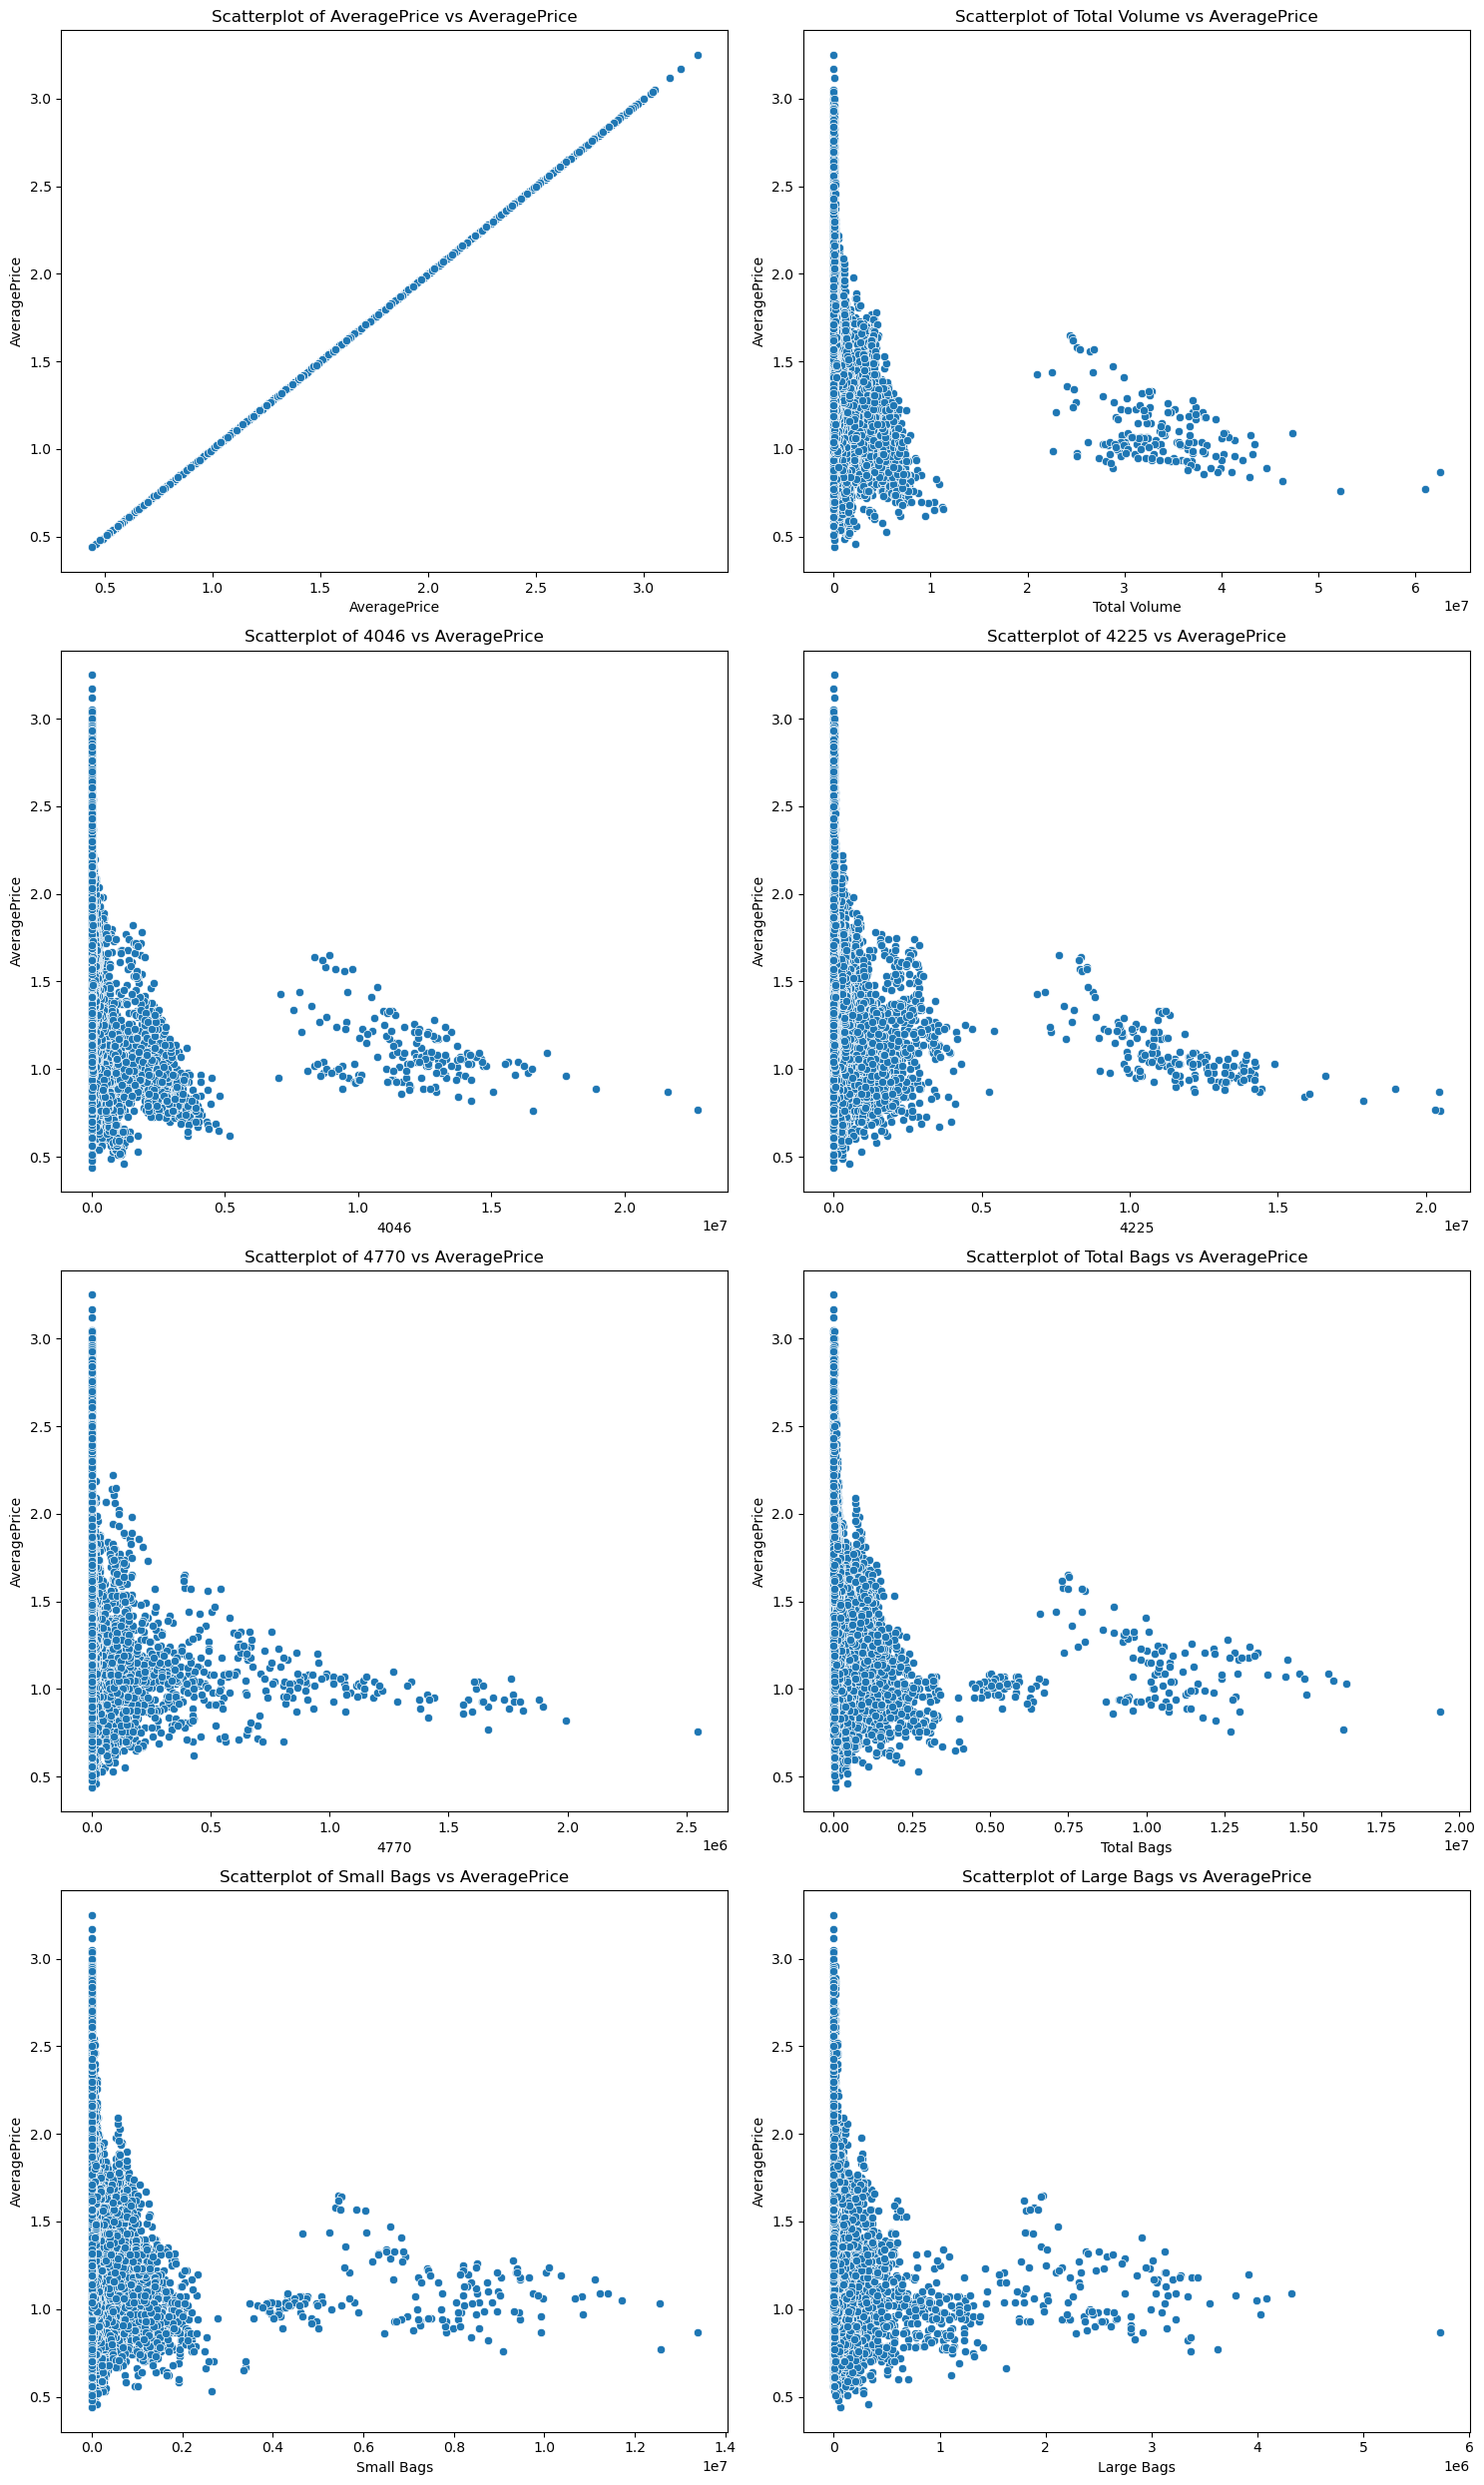

In [29]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
r = 0
c = 0

for i, n in enumerate(features_cont):
    if i % 2 == 0 and i > 0:
        r += 1
        c = 0
    if r >= 4 or c >= 2:
        break
    sns.scatterplot(x=n, y='AveragePrice', data=df, ax=ax[r, c])
    ax[r, c].set_title(f'Scatterplot of {n} vs AveragePrice')
    c += 1

plt.tight_layout()
plt.show()

Average Price is decreasing as the Quantity of Avocados is decreasing, It is having a Negative Correlation

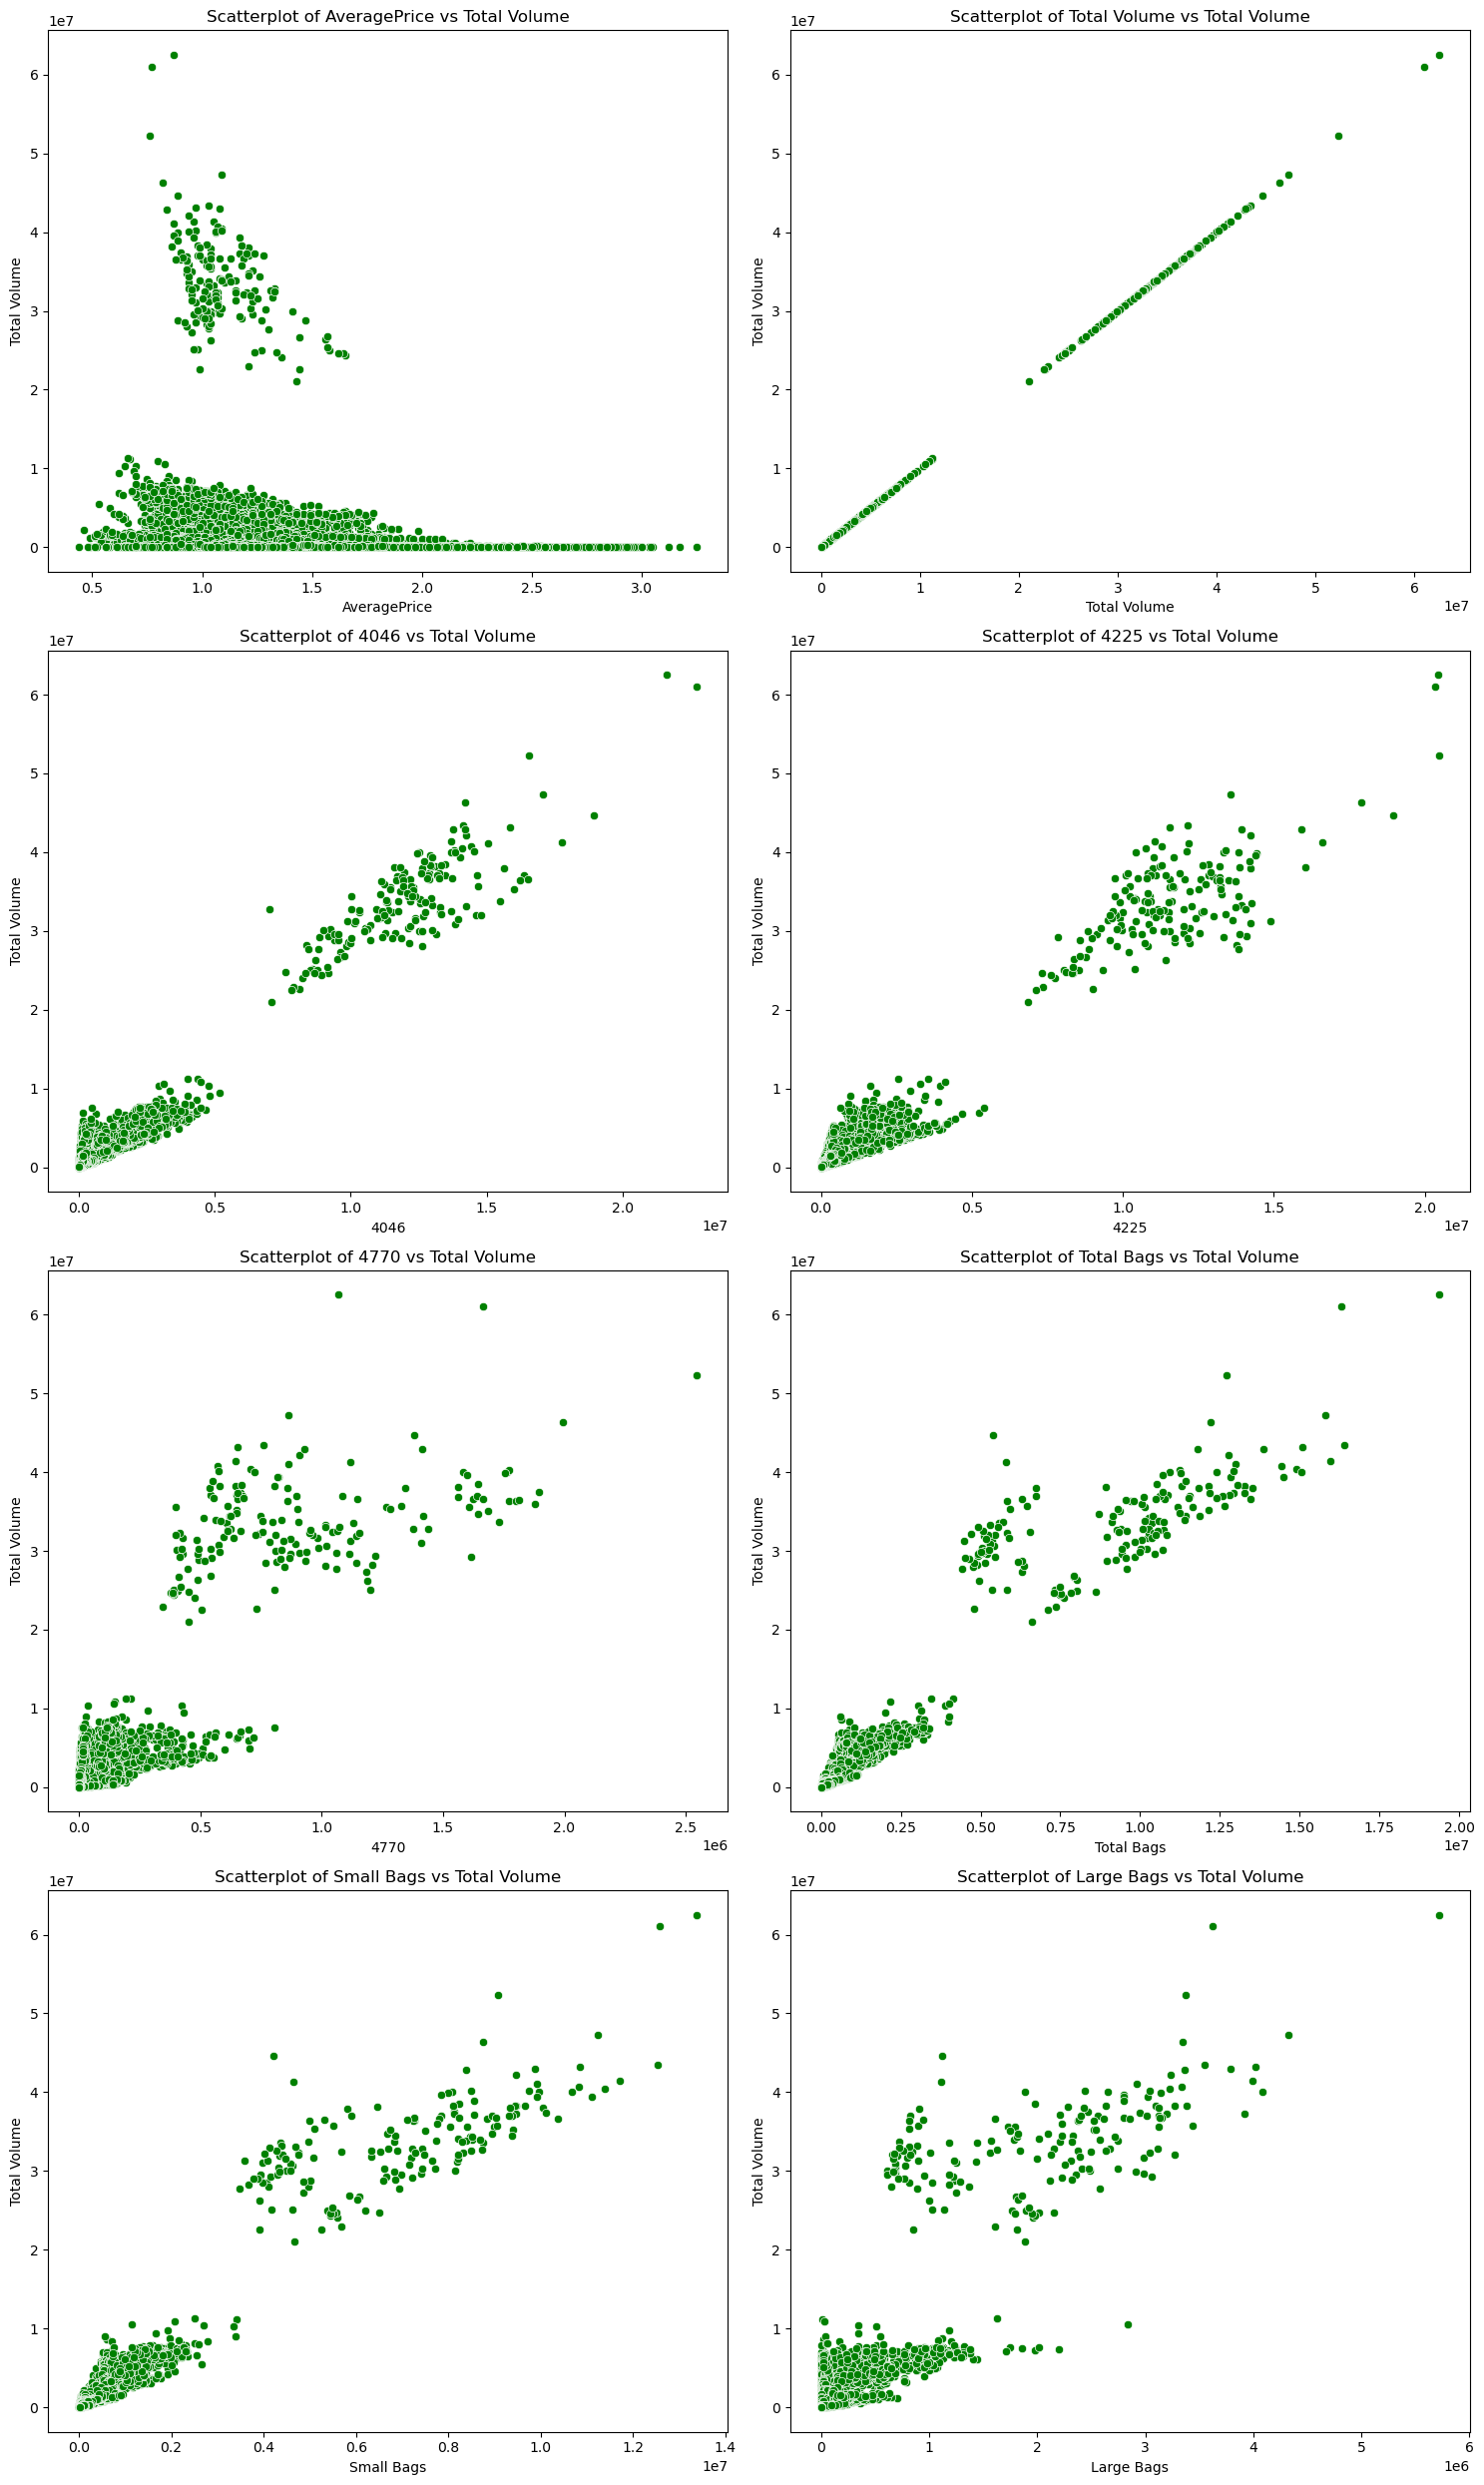

In [30]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
r = 0
c = 0

for i, n in enumerate(features_cont):
    if i % 2 == 0 and i > 0:
        r += 1
        c = 0
    if r >= 4 or c >= 2:
        break
    sns.scatterplot(x=n, y='Total Volume', data=df, ax=ax[r, c], color='g')
    ax[r, c].set_title(f'Scatterplot of {n} vs Total Volume')
    c += 1

plt.tight_layout()
plt.show()

Quantity of All Bags and PLU's Increases as the Total Volume Increases, Which is logical as More Volume will require more Bags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

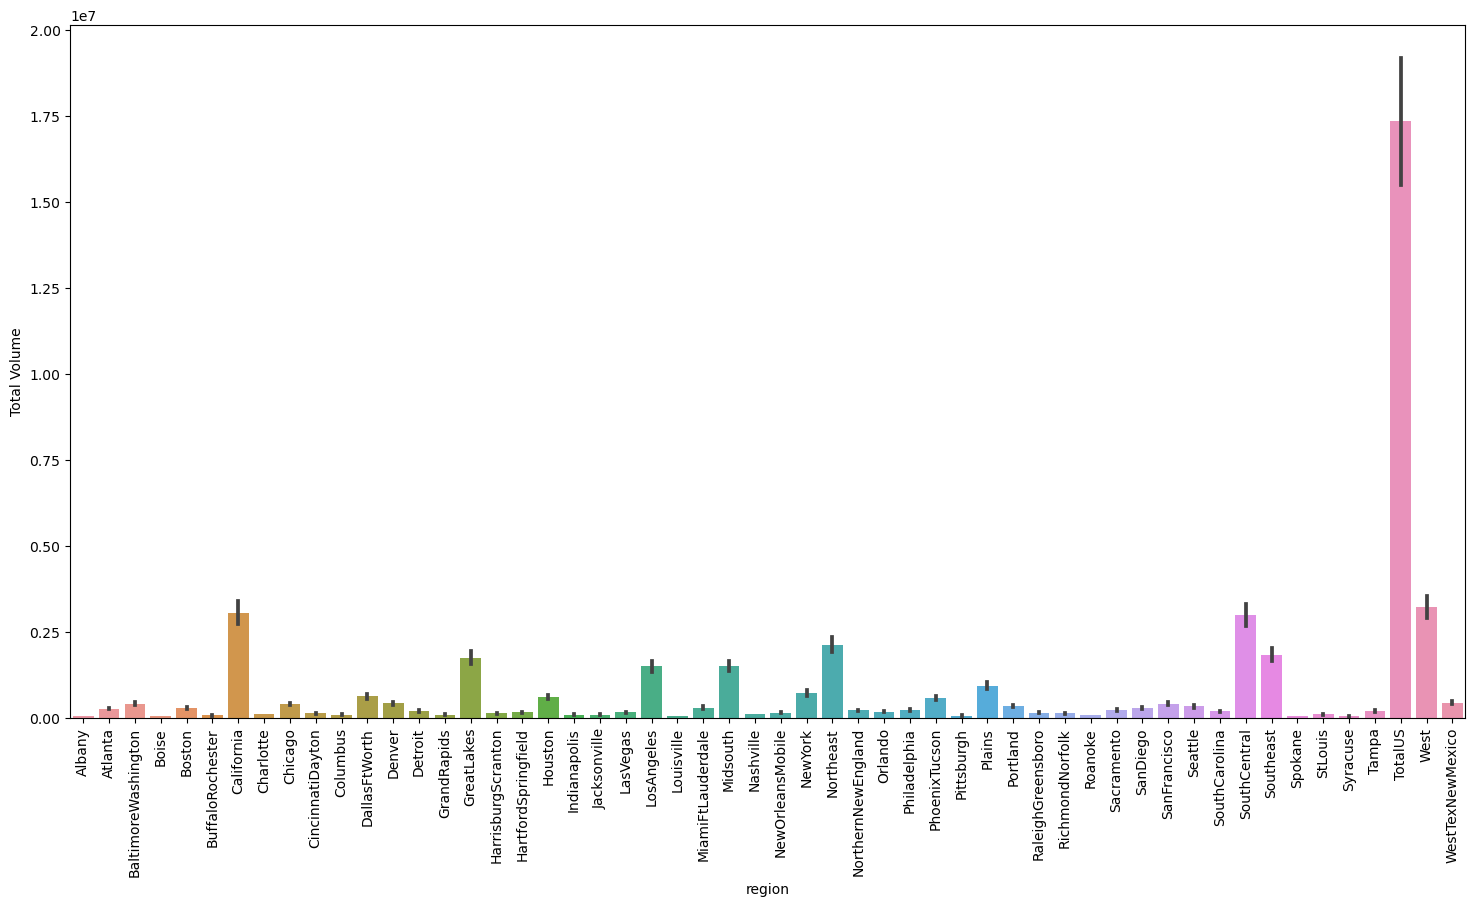

In [31]:
plt.figure(figsize=(18, 9))
sns.barplot(x='region', y='Total Volume', data=df)
plt.xticks(rotation=90)

The Regions like Las Vegas which have Low Volume have High Prices Which is Logical as Demand Decreases price Increases

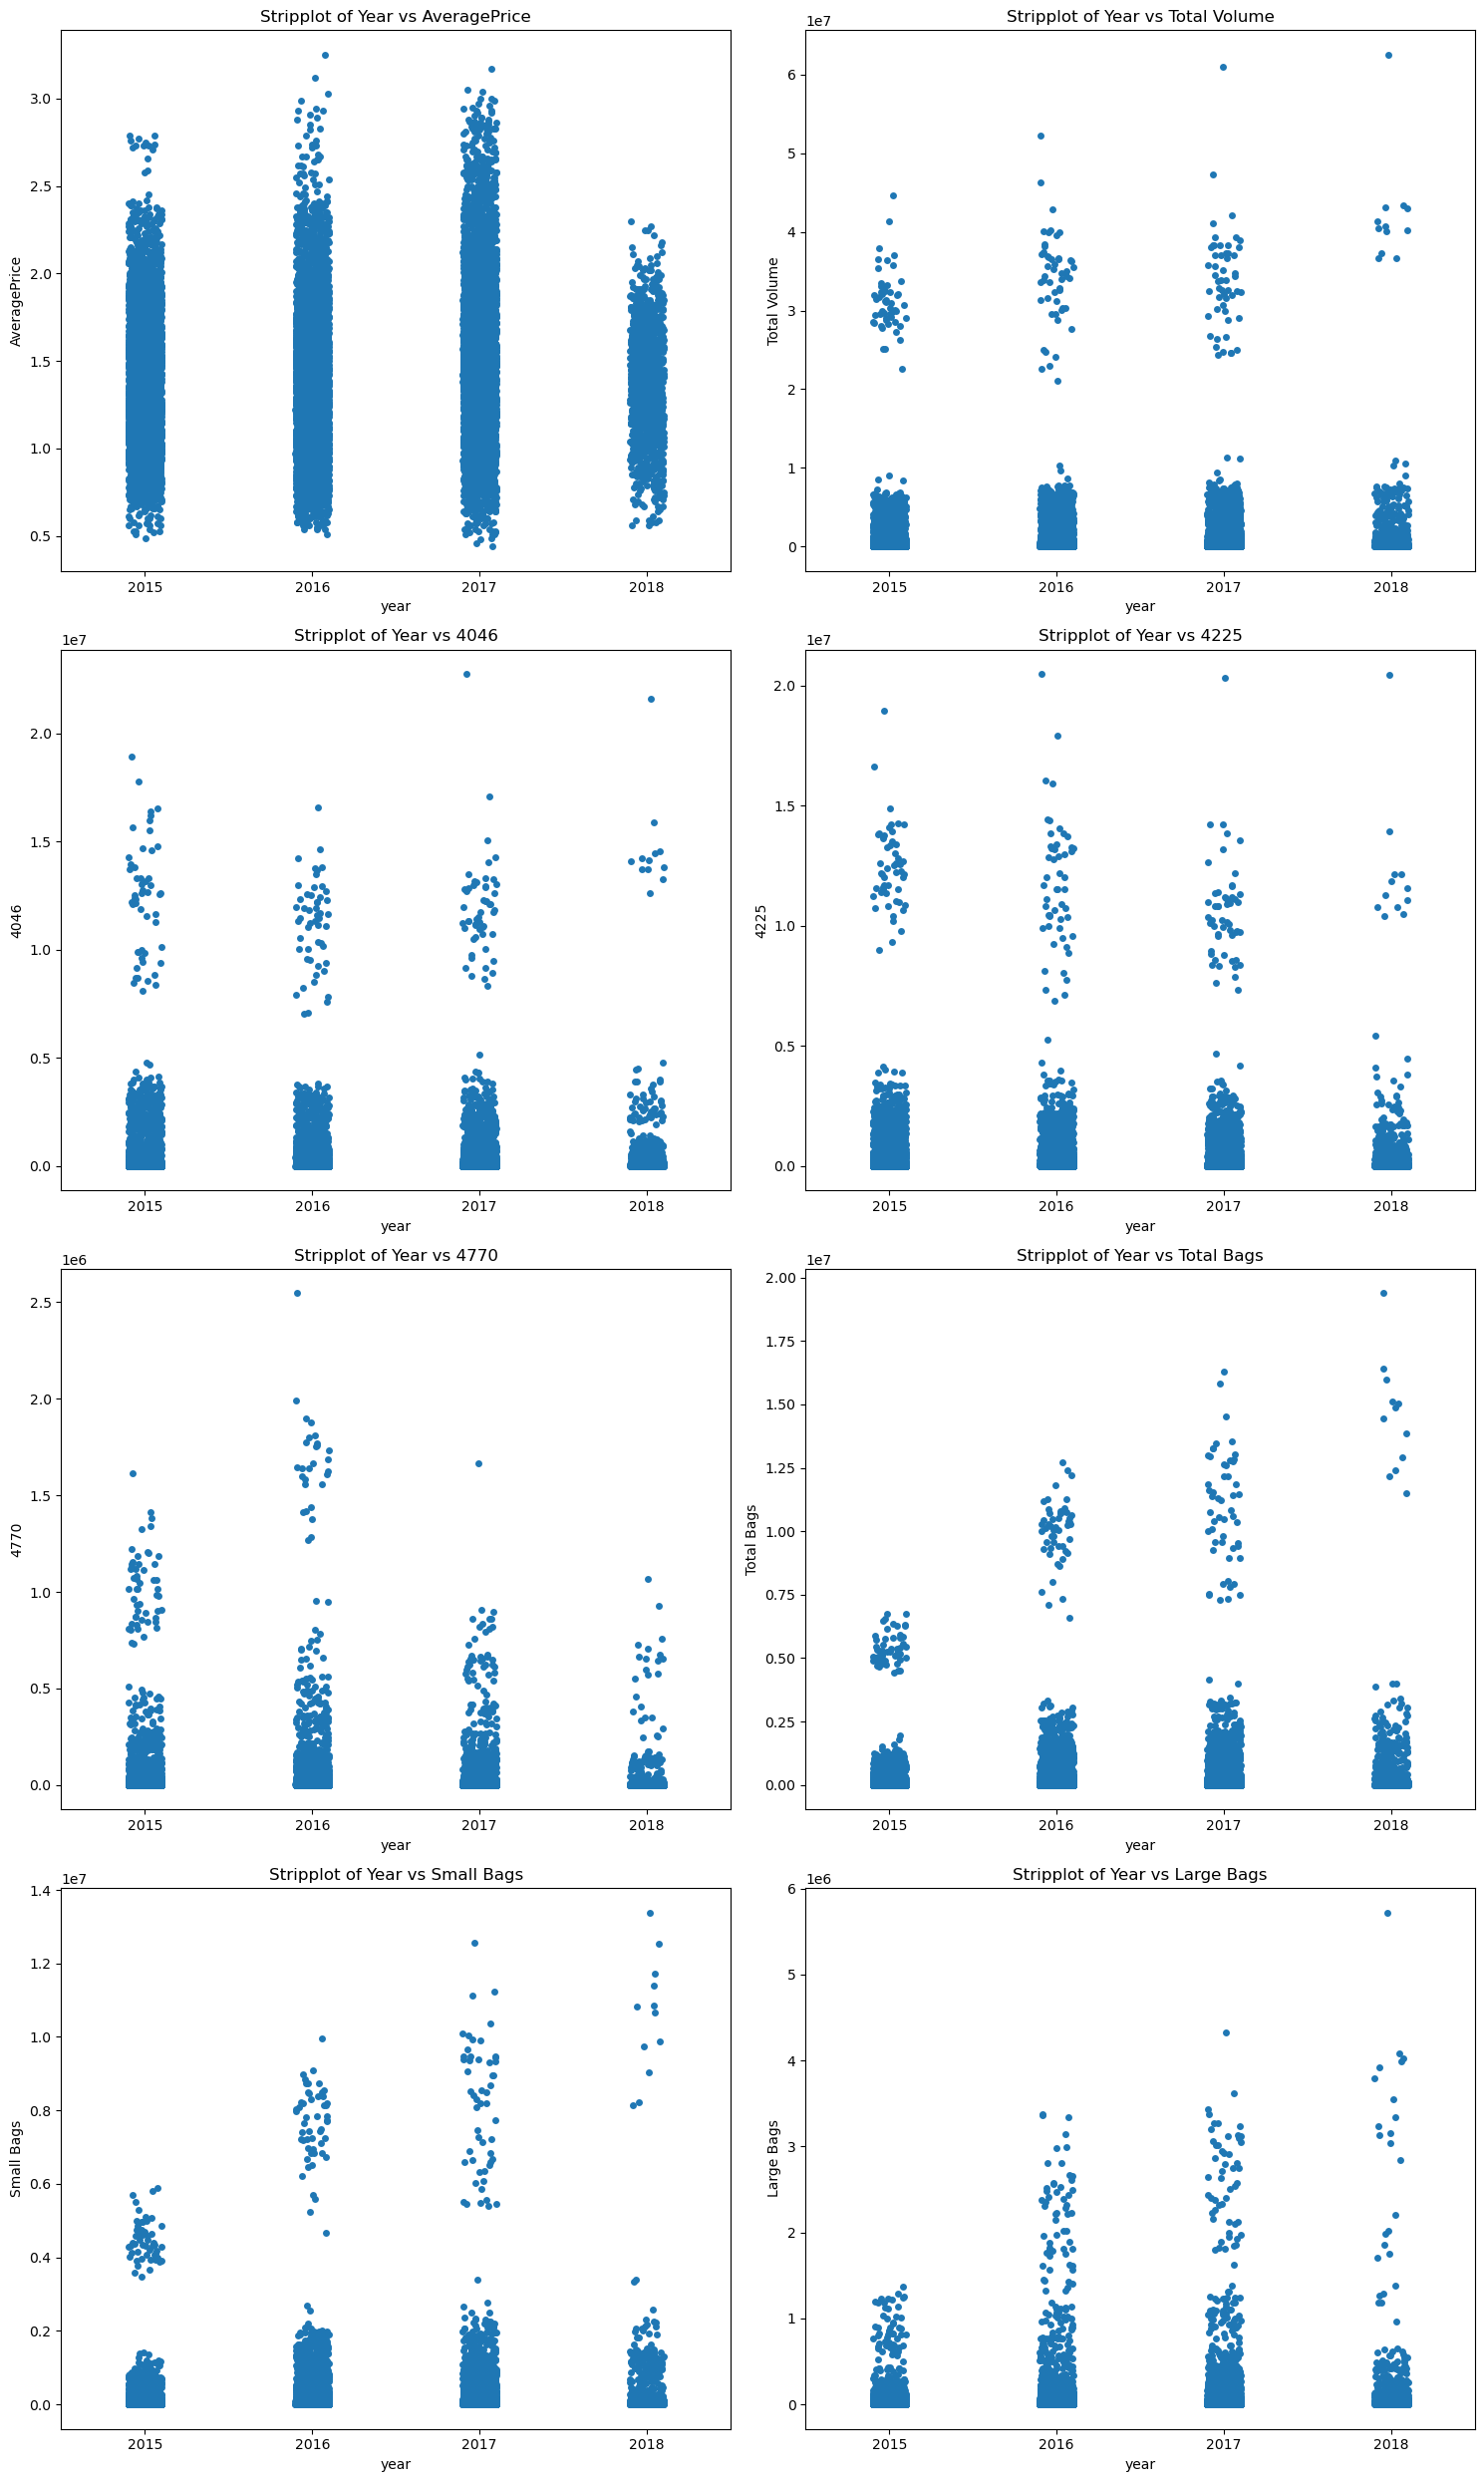

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
r = 0
c = 0

for i, n in enumerate(features_cont):
    if i % 2 == 0 and i > 0:
        r += 1
        c = 0
    if r >= 4 or c >= 2:
        break
    sns.stripplot(x='year', y=n, data=df, ax=ax[r, c])
    ax[r, c].set_title(f'Stripplot of Year vs {n}')
    c += 1

plt.tight_layout()
plt.show() 

2018 has the Highest PLU's, Total Volume and Types of Bags

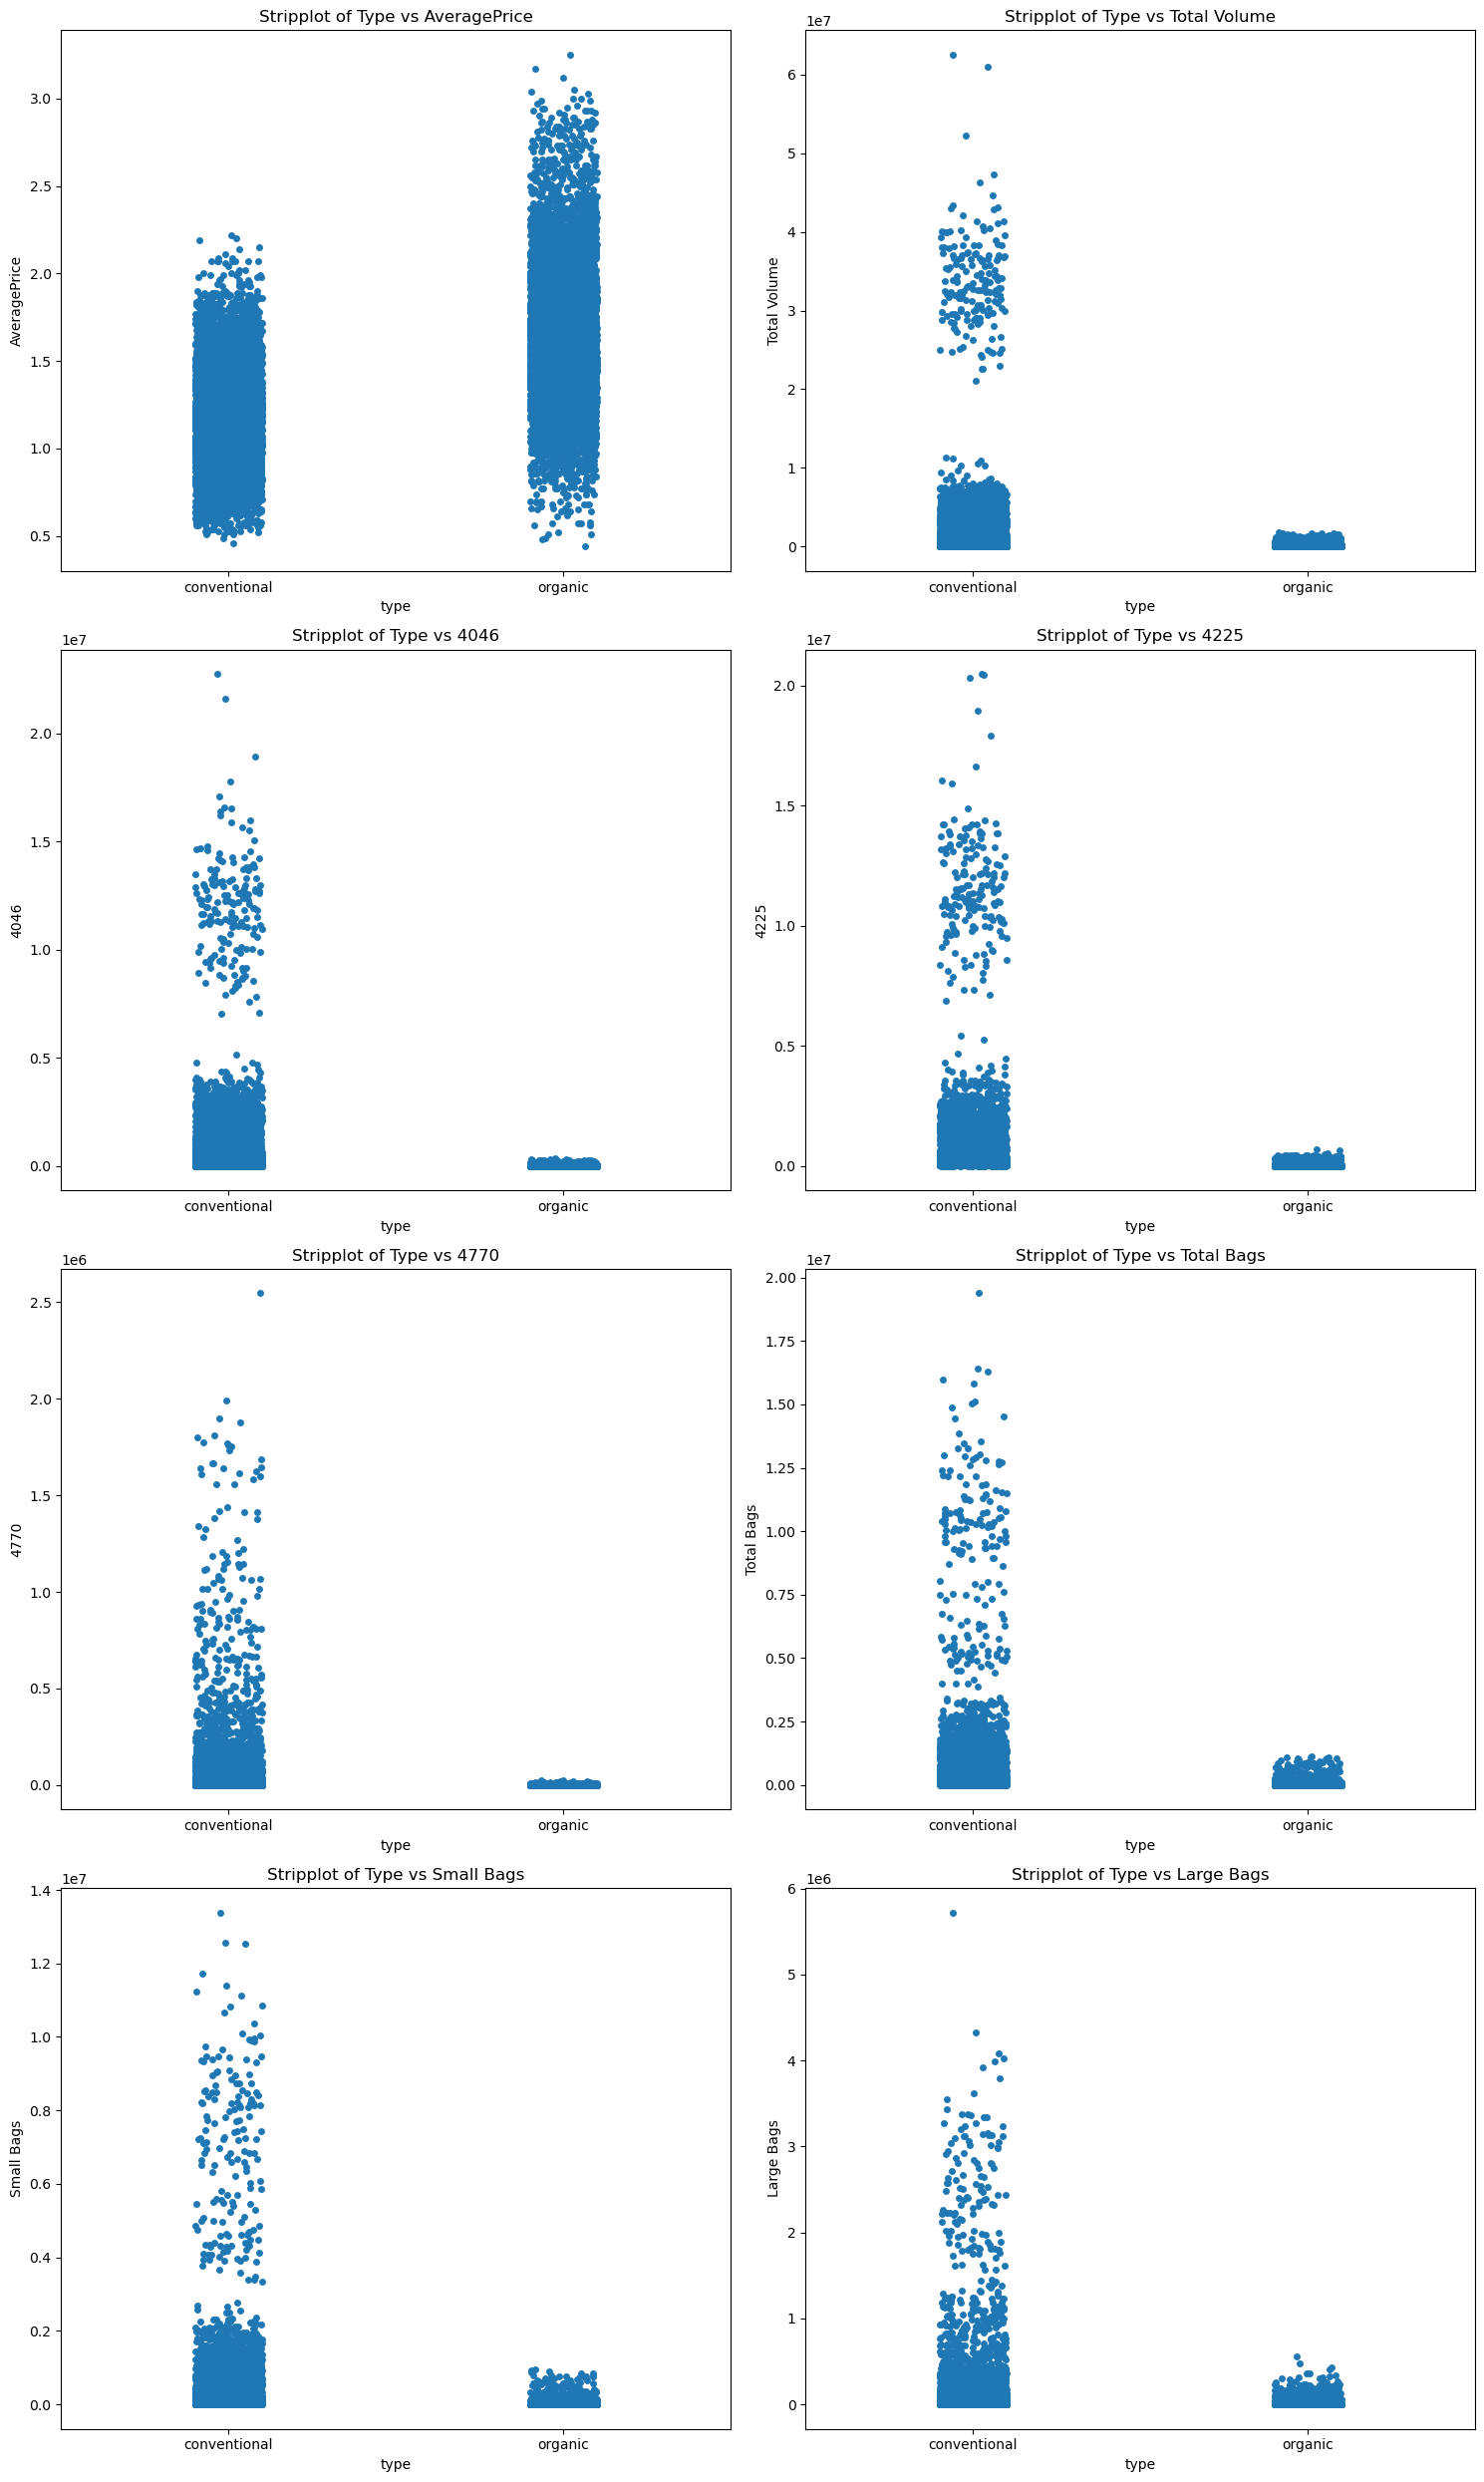

In [33]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
r = 0
c = 0

for i, n in enumerate(features_cont):
    if i % 2 == 0 and i > 0:
        r += 1
        c = 0
    if r >= 4 or c >= 2:
        break
    sns.stripplot(x='type', y=n, data=df, ax=ax[r, c])
    ax[r, c].set_title(f'Stripplot of Type vs {n}')
    c += 1

plt.tight_layout()
plt.show() 

Conventional Type of Avocado have more Types of Bags, Total Volume and PLU's 

We can interpret that though Organic Avocado have higher Average Prices Conventional Avocados are produced More

<Axes: xlabel='Total Volume', ylabel='Total Bags'>

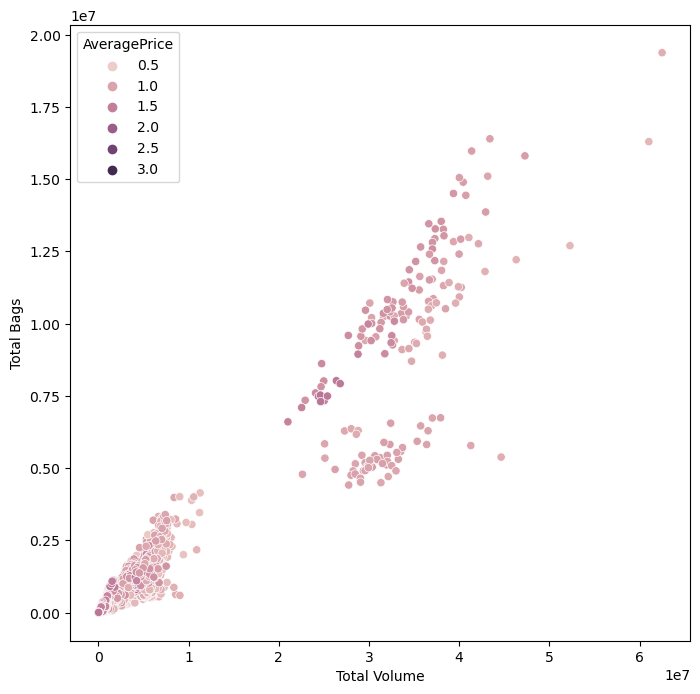

In [34]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Total Volume',y='Total Bags',hue='AveragePrice',data=df)

The Average Price Decreases when The Total Bags and Total Volume Increases

Price of Avocados is high when the Volume is Low

<Axes: xlabel='Total Bags', ylabel='4225'>

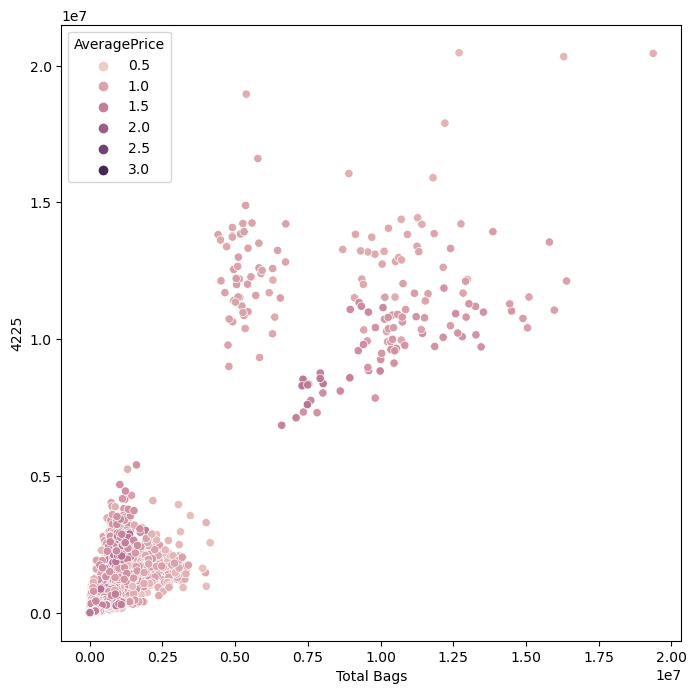

In [35]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Total Bags',y='4225',hue='AveragePrice',data=df)

This confirms the theoy that when the Supply Increases the Price decreases same can be seen here as the PLU's Increase The Total Bags Increase

<Axes: >

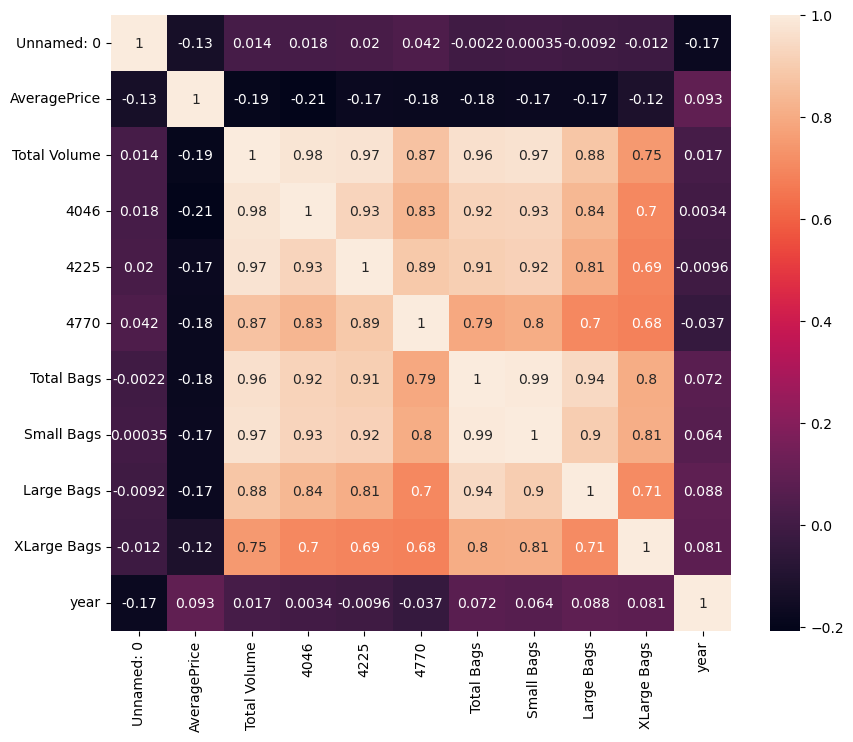

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

Average Price shows Positive Correlation with Year Only.

All Other Independent Features show 90% correlation with Each Other which show Multicolinearity

Some Features are Required to be Removed to Solve the Problem

### Feature Engineering

##### Removing Identifier and Constant Columns

In [37]:
df.drop(['Unnamed: 0', 'year'],axis=1,inplace=True)

In [38]:
#Converting date Column to Date Time Format
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date',axis=1, inplace=True)

<Axes: xlabel='Month', ylabel='AveragePrice'>

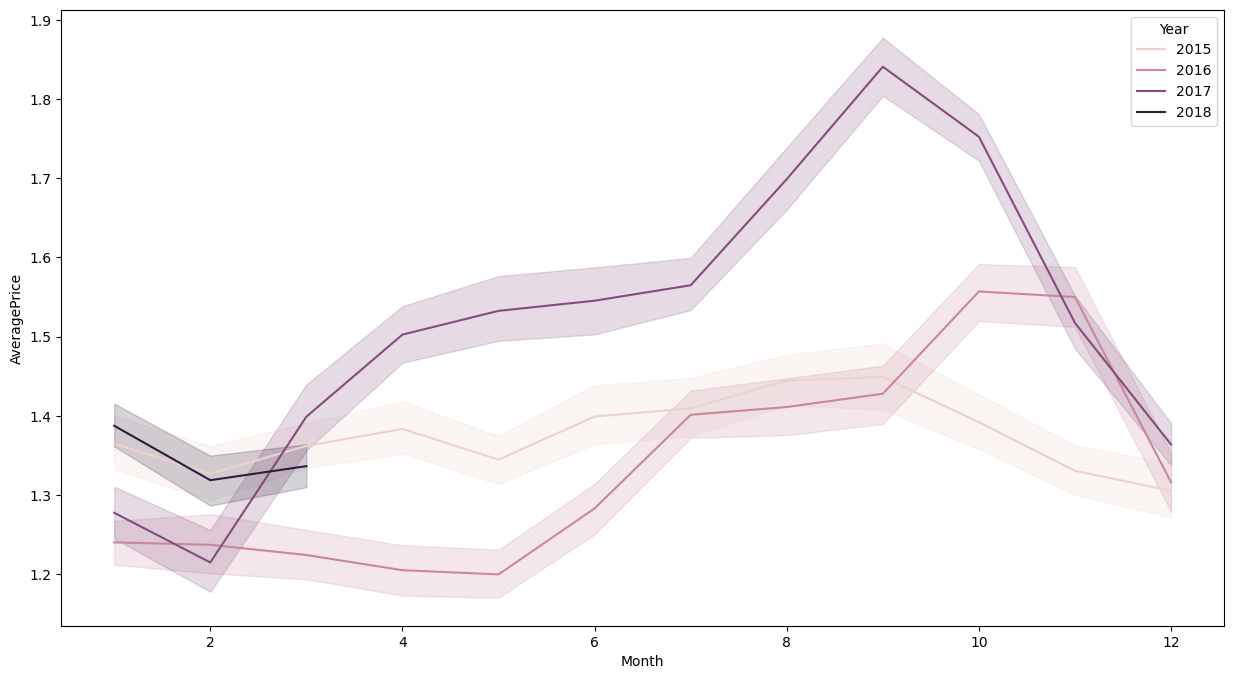

In [39]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Month',y='AveragePrice',hue='Year',data=df)

Average Price of Avocado is Highest in September , October and November as Avocado Becomes Non-Seasonal Products at these Times

Data for year 2018 is Limited

In [40]:
#We Replace 2015 and 2016 by 1 and 2 for more Simplicity
df['Year'].replace(2015,1,inplace=True)
df['Year'].replace(2016,2,inplace=True)
df['Year'].replace(2017,3,inplace=True)
df['Year'].replace(2018,4,inplace=True)

In [41]:
#Creating a Time Column using Year Month and Day and then droping the same
df['Time']=(df['Year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['Year','Month','Day'],axis=1,inplace=True)

### Encoding

In [42]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [43]:
df['region']=o.fit_transform(df['region'].values.reshape(-1,1))
df['type']=o.fit_transform(df['type'].values.reshape(-1,1))

### Removing Outliers

In [44]:
from scipy.stats import zscore
def t_hold(z, d):
    for i in np.arange(3, 4, 0.01):
        data = d.copy()
        data = data[(z < i).all(axis=1)]
        loss = (d.shape[0] - data.shape[0]) / d.shape[0] * 100
        print('With Threshold {} data loss is {}%'.format(np.round(i, 2), np.round(loss, 2)))

# Calculate z-scores
z = np.abs(zscore(df))

# Call the function
t_hold(z, df)

With Threshold 3.0 data loss is 3.28%
With Threshold 3.01 data loss is 3.27%
With Threshold 3.02 data loss is 3.19%
With Threshold 3.03 data loss is 3.17%
With Threshold 3.04 data loss is 3.14%
With Threshold 3.05 data loss is 3.13%
With Threshold 3.06 data loss is 3.12%
With Threshold 3.07 data loss is 3.09%
With Threshold 3.08 data loss is 3.07%
With Threshold 3.09 data loss is 3.03%
With Threshold 3.1 data loss is 3.0%
With Threshold 3.11 data loss is 3.0%
With Threshold 3.12 data loss is 2.95%
With Threshold 3.13 data loss is 2.94%
With Threshold 3.14 data loss is 2.89%
With Threshold 3.15 data loss is 2.89%
With Threshold 3.16 data loss is 2.88%
With Threshold 3.17 data loss is 2.85%
With Threshold 3.18 data loss is 2.84%
With Threshold 3.19 data loss is 2.83%
With Threshold 3.2 data loss is 2.81%
With Threshold 3.21 data loss is 2.8%
With Threshold 3.22 data loss is 2.78%
With Threshold 3.23 data loss is 2.76%
With Threshold 3.24 data loss is 2.73%
With Threshold 3.25 data loss i

In [45]:
#We Use Threshold as 3.57
df=df[(z<3.57).all(axis=1)]

### Removing Skewness

In [46]:
features_cont.append('Time')

In [47]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

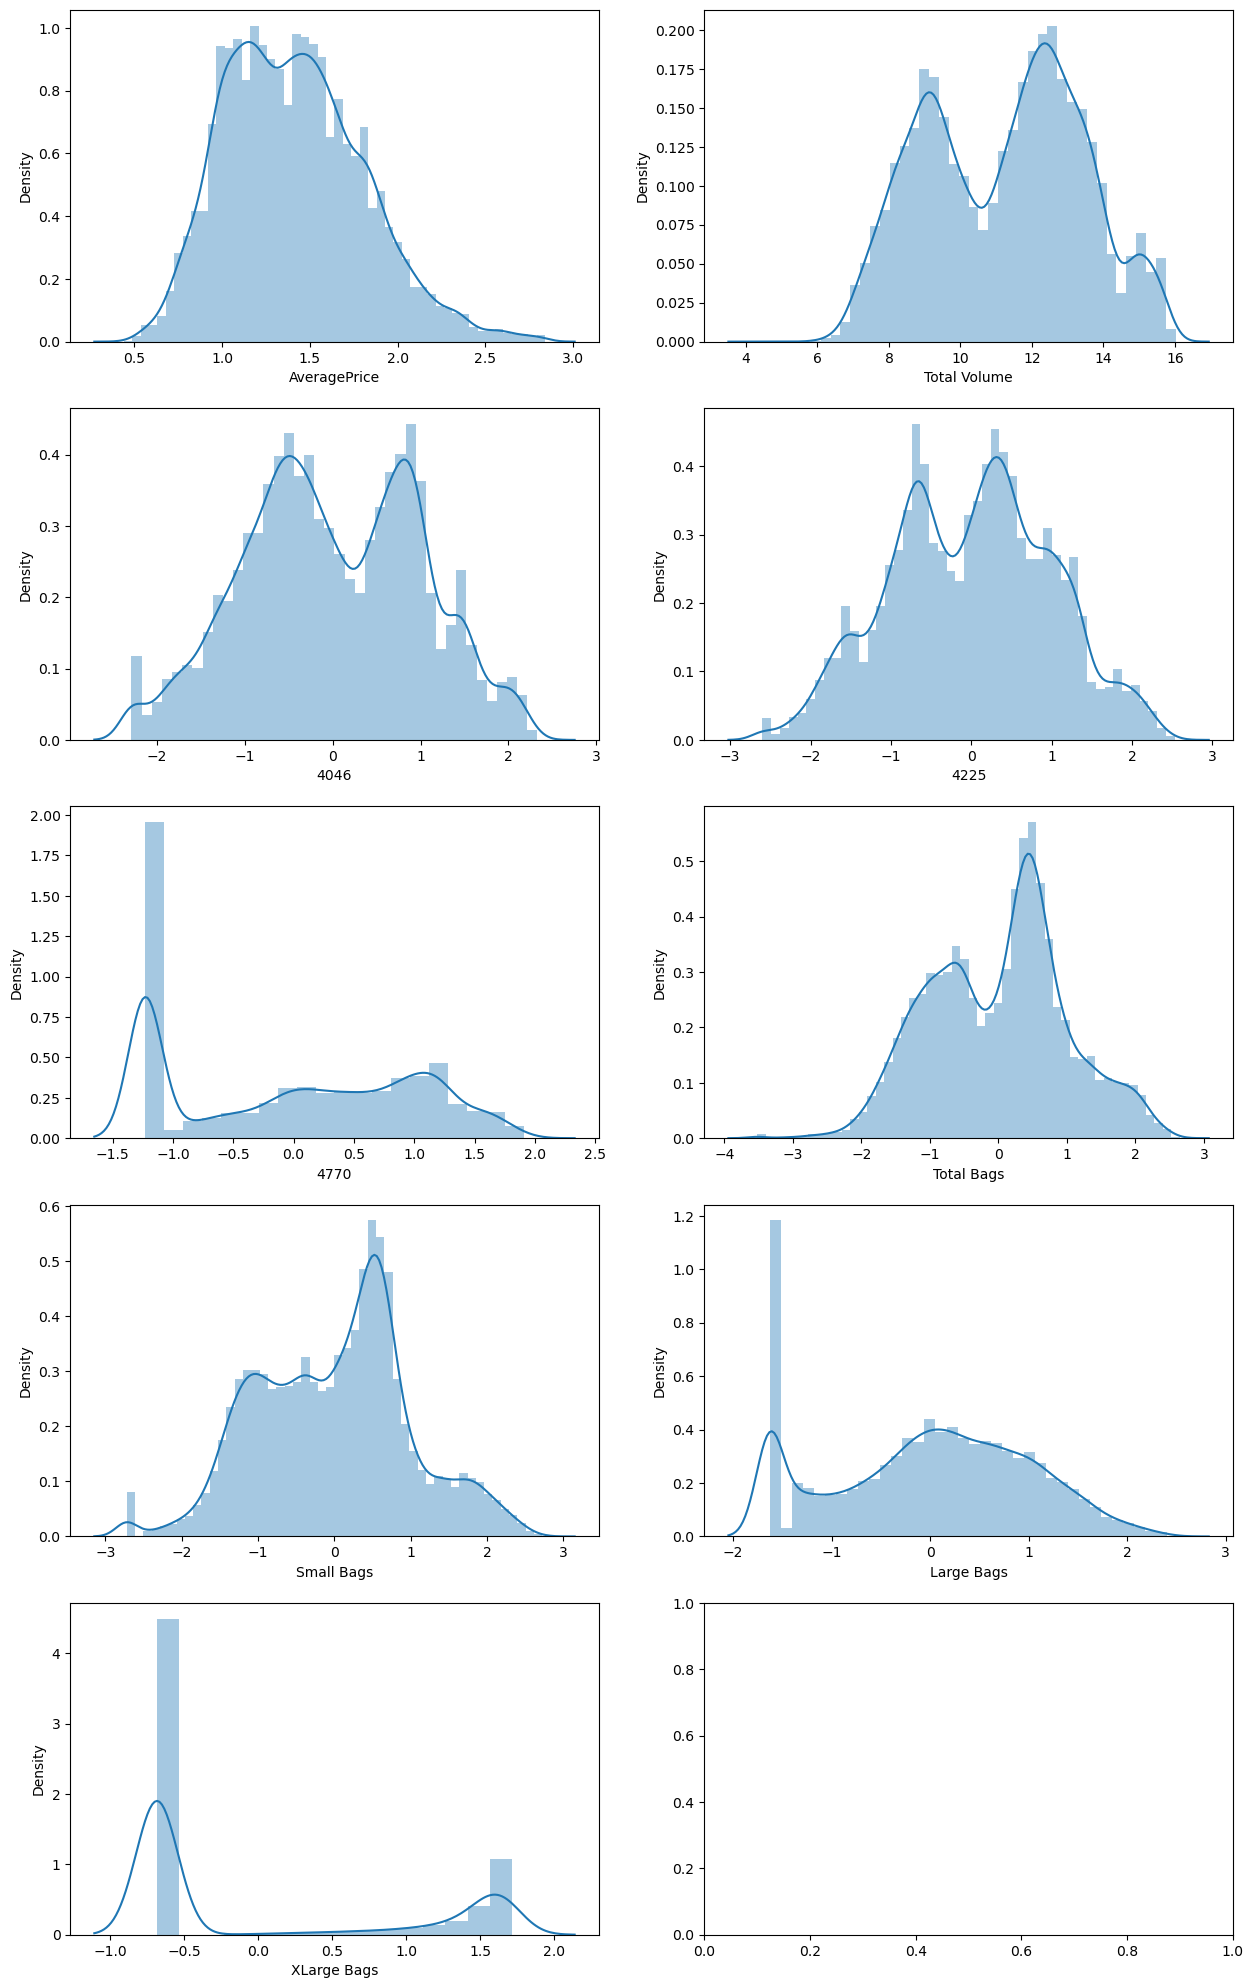

In [48]:
#We make use of Power Transformer to remove skewness from all Columns except Total Volume
for i in features_cont:
    if np.abs(df[i].skew())>0.5 and i!='Total Volume':
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))
        
df['Total Volume']=np.log(df['Total Volume'])

fig,ax=plt.subplots(5,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(features_cont):
    if r==4 and c==1:
        break
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

In [49]:
df.skew()

AveragePrice    0.489112
Total Volume   -0.032168
4046           -0.037678
4225           -0.042688
4770            0.025921
Total Bags     -0.019751
Small Bags     -0.022505
Large Bags     -0.107871
XLarge Bags     0.842951
type           -0.035187
region          0.009740
Time            0.009355
dtype: float64

Skewness is Negligible after transformation

### Seperating Dependent and Independent Variables

In [50]:
X=df.copy()
X.drop('AveragePrice',axis=1,inplace=True)

y=df['AveragePrice']

### Scaling the Data

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [52]:
Xd=scaler.fit_transform(X)
X=pd.DataFrame(Xd,columns=X.columns)

### Modeling

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [54]:
#Choosing Best Random State using Linear Regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        X_train, X_test, y_train, y_test=train_test_split(a,b, test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(X_train,y_train)
        p=model.predict(X_test)
        mse=mean_squared_error(p,y_test)
        if maxx>mse:
            maxx=mse
            j=state
        return j

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a list of models to test
model_list = [
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('SVR', SVR()),
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor())
]

# Create lists to store the results
results = []

# Loop through each model and evaluate it
for name, model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    })


results_df = pd.DataFrame(results)

print(results_df)

                 Model  Mean Absolute Error  Mean Squared Error  \
0  KNeighborsRegressor             0.099319            0.019513   
1                  SVR             0.154160            0.043041   
2    Linear Regression             0.208544            0.070785   
3     Lasso Regression             0.318442            0.155381   
4     Ridge Regression             0.208680            0.070909   
5        Decision Tree             0.120981            0.035759   
6        Random Forest             0.086554            0.015276   
7             AdaBoost             0.205947            0.065658   
8    Gradient Boosting             0.145865            0.036931   
9              XGBoost             0.088431            0.014712   

   Root Mean Squared Error  R-squared  
0                 0.139690   0.874406  
1                 0.207464   0.722975  
2                 0.266054   0.544411  
3                 0.394183  -0.000073  
4                 0.266287   0.543610  
5                 0.18

In [56]:
results_df

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,KNeighborsRegressor,0.099319,0.019513,0.139690,0.874406
1,SVR,0.154160,0.043041,0.207464,0.722975
2,Linear Regression,0.208544,0.070785,0.266054,0.544411
3,Lasso Regression,0.318442,0.155381,0.394183,-0.000073
4,Ridge Regression,0.208680,0.070909,0.266287,0.543610
5,Decision Tree,0.120981,0.035759,0.189102,0.769842
6,Random Forest,0.086554,0.015276,0.123597,0.901678
7,AdaBoost,0.205947,0.065658,0.256239,0.577405
8,Gradient Boosting,0.145865,0.036931,0.192174,0.762302
9,XGBoost,0.088431,0.014712,0.121295,0.905307


Above the Evaluation Results of the Models

Removing Multicollinearity with L1 Regularization

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 0.1, 1, 5, 10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110, 150, 1000]
}

m1 = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=10)
m1.fit(X, y)

coefficients = m1.best_estimator_.coef_
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, pd.DataFrame(np.abs(coefficients))], axis=1)
featureScores.columns = ['Features', 'Coefficients']

feature=pd.DataFrame(featureScores)

feature

,Features,Coefficients
0,Total Volume,1.475646
1,4046,0.076741
2,4225,1.369295
3,4770,0.109106
4,Total Bags,1.736065
5,Small Bags,1.110460
6,Large Bags,0.147067
7,XLarge Bags,0.008122
8,type,0.366694
9,region,0.051578


In [69]:
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
4,Total Bags,1.736065
0,Total Volume,1.475646
2,4225,1.369295
5,Small Bags,1.110460
10,Time,0.375716
8,type,0.366694
6,Large Bags,0.147067
3,4770,0.109106
1,4046,0.076741
9,region,0.051578


### Finalizing the Model 

XGB Booster is giving the best Performance with minimum Errors so choosing and Finalising the Same

In [70]:
from sklearn.model_selection import cross_val_score

model = XGBRegressor(colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=7)
model.fit(X_train, y_train)
p = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=10)

print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.32967884 0.61093716 0.70083602 0.64564809 0.67916316 0.42779247
 0.6271076  0.62095211 0.62963695 0.5366398 ]


### Evaluation Metrics

In [65]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,y_test)),4))
print('R2 Score is',np.round(r2_score(p,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(scores)*100,4))

Mean Absolute Error is 0.0887
Mean Squared Error is 0.0149
Root Mean Squared Error is 0.1219
R2 Score is 87.91
Mean of cross validaton Score is 58.0839


Text(0.5, 1.0, 'XGBRegressor')

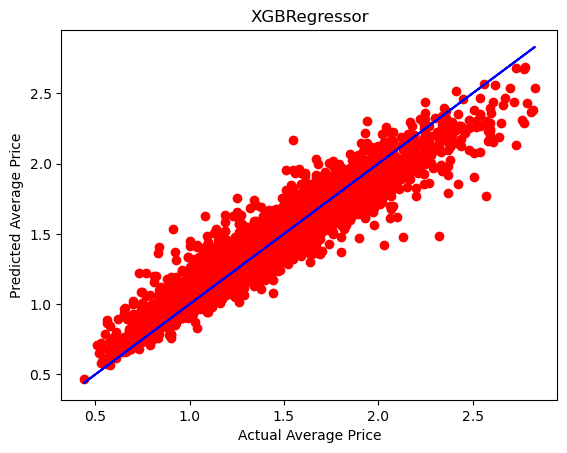

In [68]:
plt.scatter(x=y_test,y=p,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')

### Saving the Model

In [71]:
import pickle

In [72]:
model_filename = 'Avocado.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved to:", model_filename)

Model saved to: Avocado.pkl
